## Table of Contents

- [BOOKMARK](#BOOKMARK)

## EDA: questionaire

Taking a closer look the questionaire data to glean insight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ch83dg = pd.read_csv('./cleaned_data/ch83dg.csv', index_col=[0])
ch83m = pd.read_csv('./cleaned_data/ch83m.csv', index_col=[0])
ch83pru = pd.read_csv('./cleaned_data/ch83pru.csv', index_col=[0])
ch83q = pd.read_csv('./cleaned_data/ch83q.csv', index_col=[0])
ch89dg = pd.read_csv('./cleaned_data/CH89DG.csv', index_col=[0])
# ch89m = pd.read_csv('./cleaned_data/ch89m.csv', index_col=[0]) # Will added better column headers
ch89m = pd.read_csv('./cleaned_data_descriptive/ch89m.csv', index_col=[0])
ch89pru = pd.read_csv('./cleaned_data/ch89pru.csv', index_col=[0])
ch89q = pd.read_csv('./cleaned_data/ch89q.csv', index_col=[0])
ch93pru = pd.read_csv('./cleaned_data/ch93pru.csv', index_col=[0])
ch93q = pd.read_csv('./cleaned_data/ch93q.csv', index_col=[0])
chtaim = pd.read_csv('./cleaned_data/chtaim.csv', index_col=[0])
chtaipru = pd.read_csv('./cleaned_data/chtaipru.csv', index_col=[0])
chtaiq = pd.read_csv('./cleaned_data/chtaiq.csv', index_col=[0])

In [3]:
# ch83q.columns.to_list()
# ch89q.columns.to_list()
# ch93q.columns.to_list()
# chtaiq.columns.to_list()

# Only ch89q has all the questions outlined in the study details.
# Not all questions present in each table.

In [4]:
ch83q['county'].value_counts().count(), \
ch89q['county'].value_counts().count(), \
ch93q['county'].value_counts().count(), \
chtaiq['county'].value_counts().count()

(68, 68, 13, 16)

#### We do not have the same number of counties in each survey. Nor do we have the same questions answered in each survey.

It may be more beneficial to focus on the 1983 and 1986-89 survey results instead.

In the code below, I explore which data sets have health related information based on the questionnaire as described in (./data/'CHNAME.txt'). Any question that may glean health related information is parsed across all data tables for content. 

Data Notes: 

Each County provides 3 rows per Xiang (commune) split by Male (M), Female(F), Average M+F (T), Xiang 1, Xiang 2, and Avg Xiang 1+2 (3).

In order to get detailed information, much filtering is required. For this beginning EDA, I am focusing on sex = T and xiang = 3 for an overall average of each question unless specified otherwise.

In [5]:
# q001: TOTAL 1989 XIANG POPULATION (1000s) 

ch89q['q001'].describe()

count    207.000000
mean      27.582126
std       19.162509
min        1.400000
25%       13.700000
50%       21.300000
75%       37.315000
max       91.820000
Name: q001, dtype: float64

In [6]:
ch89q['county'].fillna('NA', inplace=True)

In [7]:
 ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')]

8      AA
17     AB
26     AC
35     BA
44     BB
       ..
584    WB
593    WC
602    XA
611    XB
620    YA
Name: county, Length: 69, dtype: object

#### There is so much data, it'll be easier and more time efficient for me to visualize most of it with graphs to glean insight. 

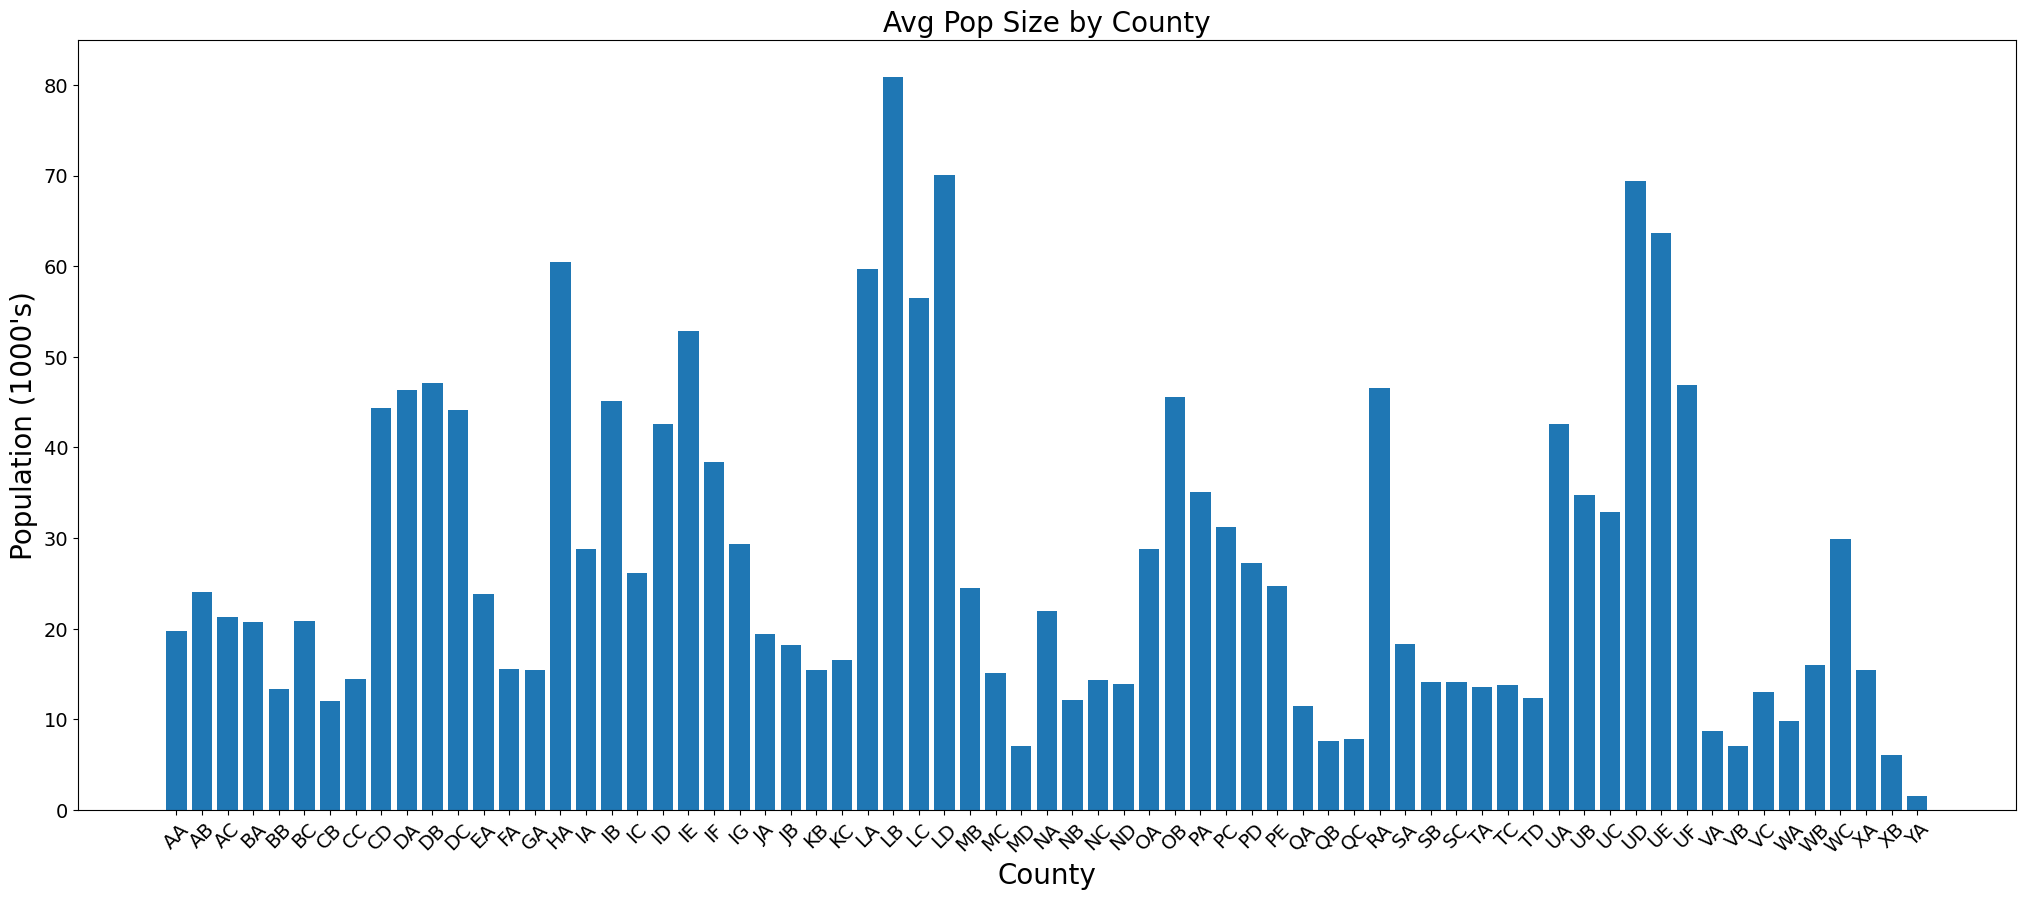

In [8]:
plt.figure(figsize=(25,10))
plt.bar(x =  ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
    height =  ch89q['q001'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Population (1000's)", fontsize=20)
plt.title('Avg Pop Size by County', fontsize=20)
plt.show;

In [9]:
# Average population size 27,582
# largest population 91,8200
# smallest population 1,400

Taking a look at scale of study and magnitude of data. Does the population size affect mortality rates in any capacity? Is it better to live in a small town versus a big city? What constitutes small vs big city?

In [10]:
# q002: NUMBER OF VILLAGES IN XIANG
ch89q['q002'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')].describe()

count     69.000000
mean      19.608696
std       18.743797
min        6.000000
25%       11.000000
50%       16.000000
75%       22.000000
max      152.000000
Name: q002, dtype: float64

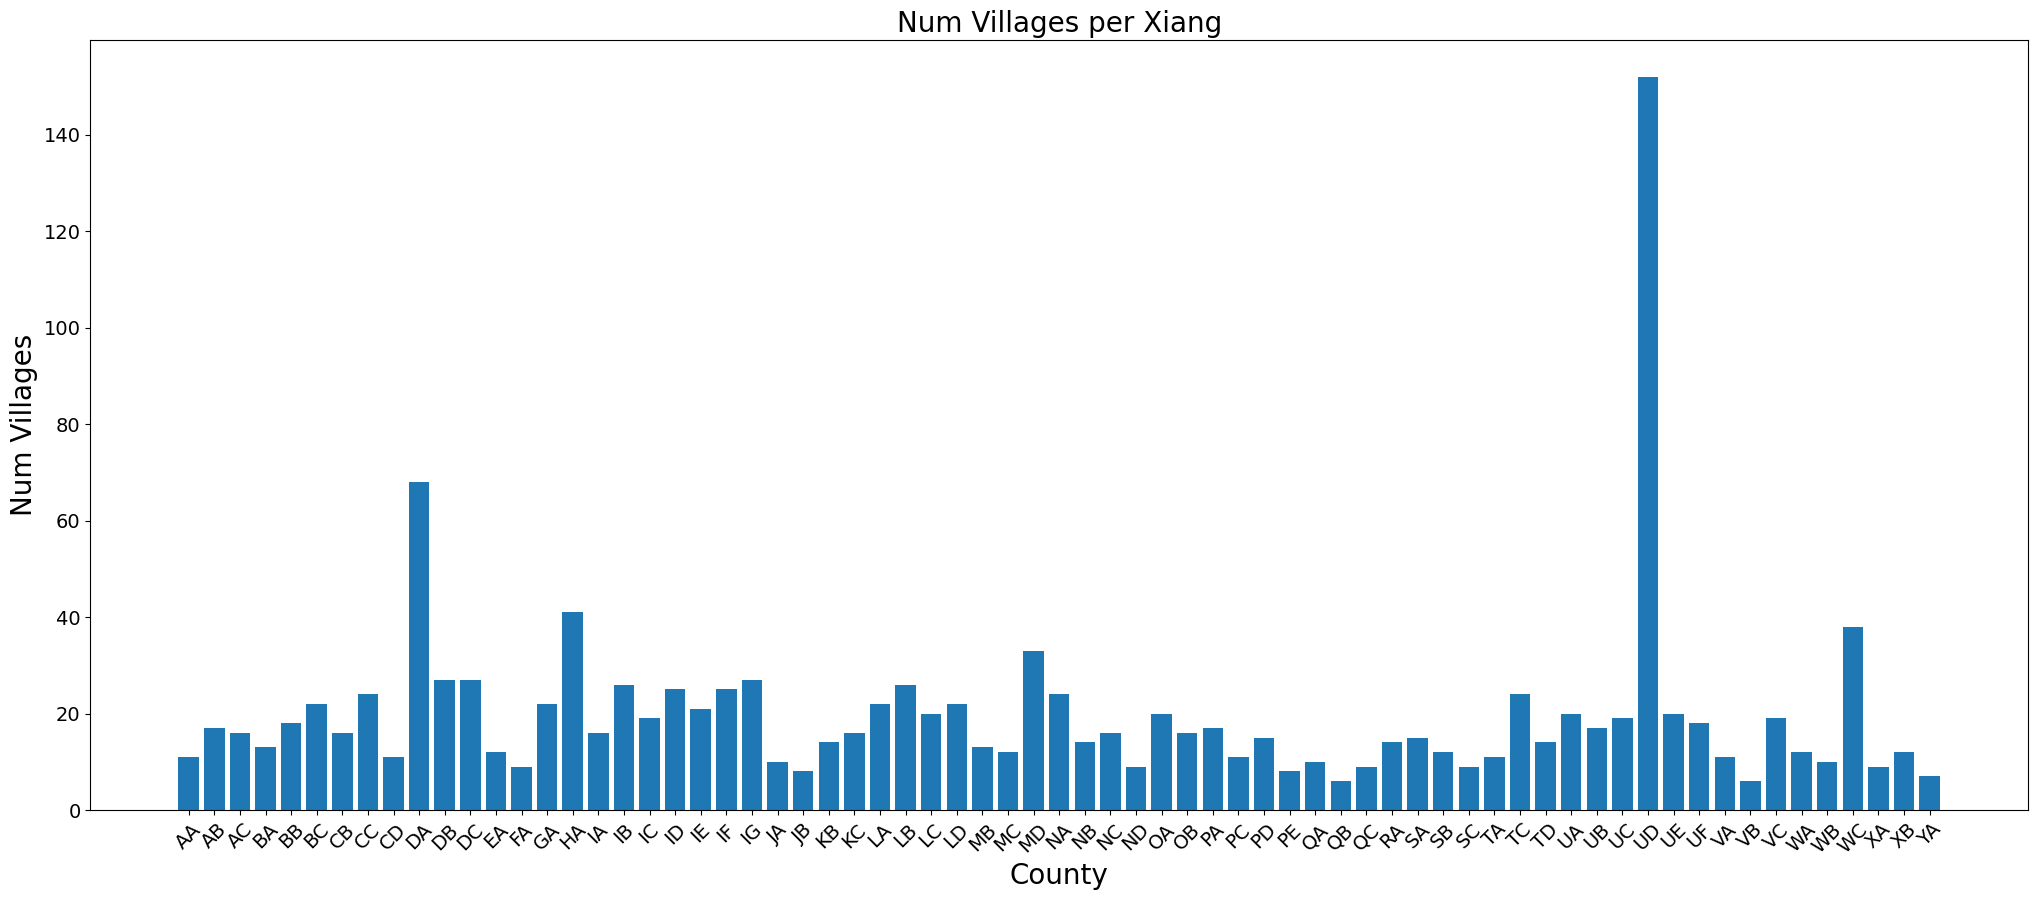

In [11]:
plt.figure(figsize=(25,10))
plt.bar(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        height = ch89q['q002'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Num Villages", fontsize=20)
plt.title('Num Villages per Xiang', fontsize=20)
plt.show;

In [12]:
# q010 PERCENTAGE OF HOUSEHOLD HEADS WHOSE PRIMARY OCCUPATION IS AGRICULTURE
# ch83q[['q010']].describe()

In [13]:
ch89q[['q010']][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')].describe()

,q010
count,69.000000
mean,75.240580
std,19.185873
min,0.000000
25%,71.700000
50%,81.600000
75%,88.100000
max,96.700000


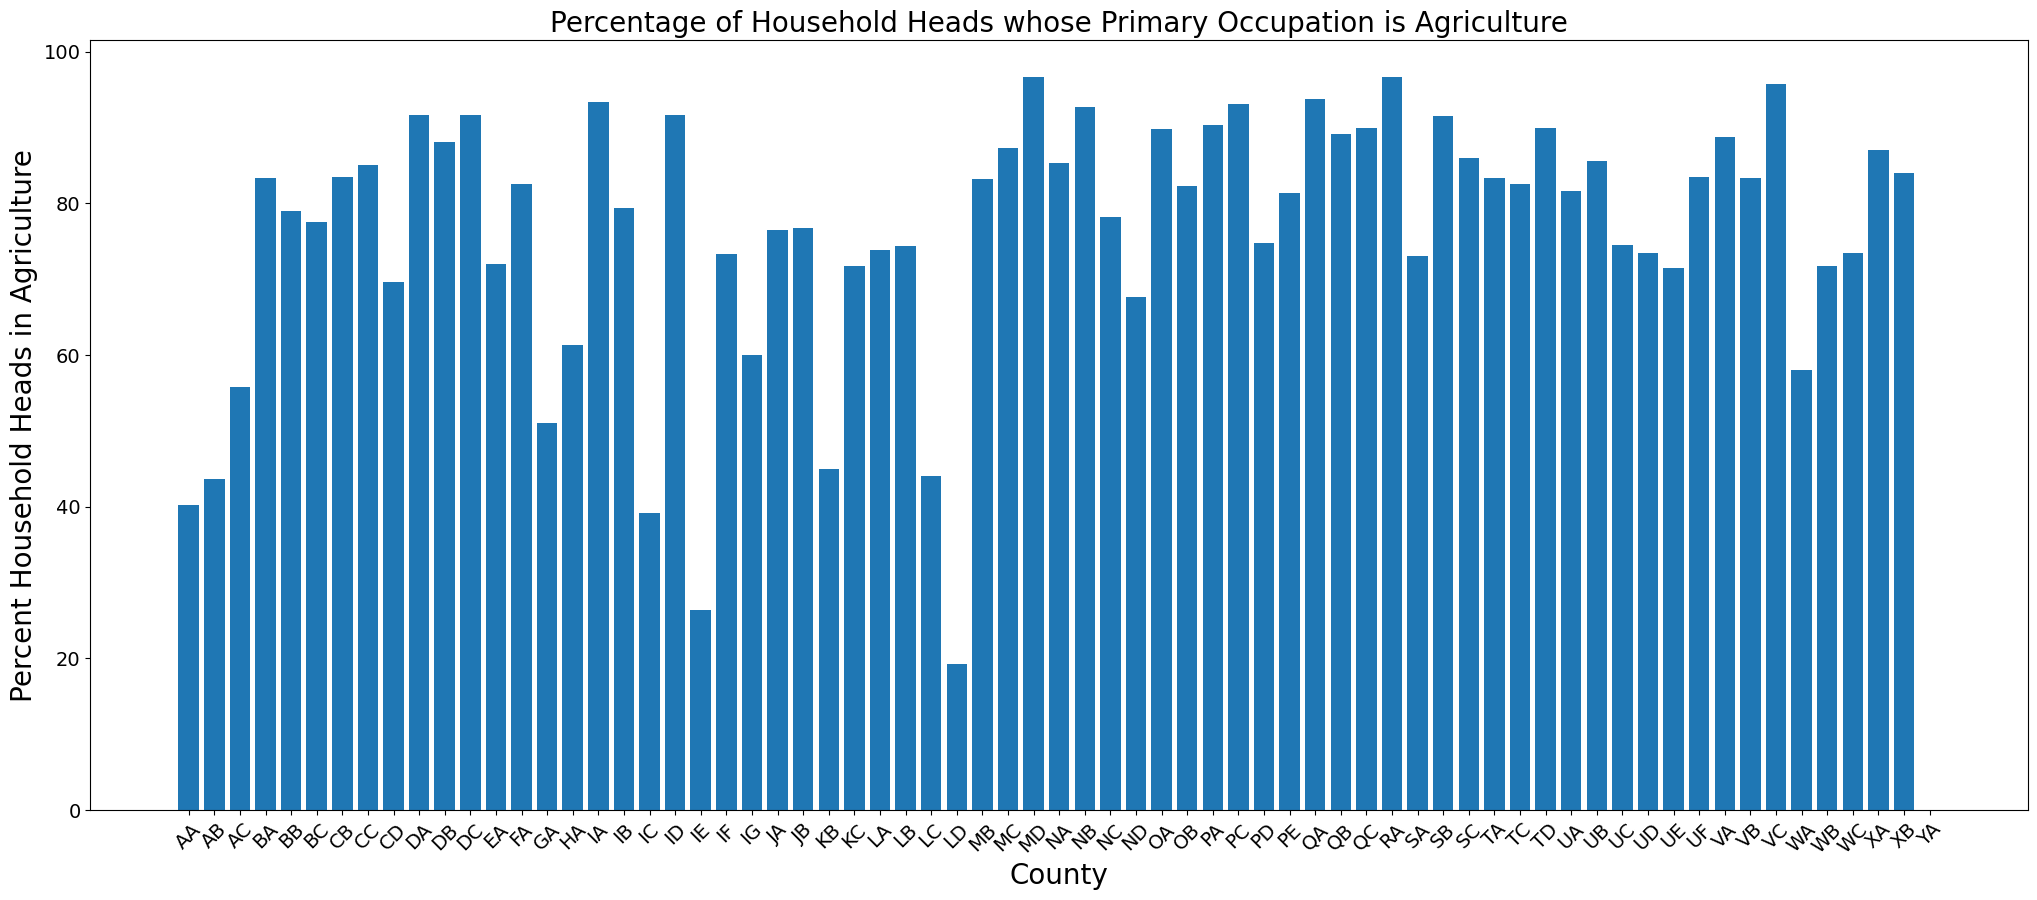

In [14]:
plt.figure(figsize=(25,10))
plt.bar(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        height = ch89q['q010'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Percent Household Heads in Agriculture", fontsize=20)
plt.title('Percentage of Household Heads whose Primary Occupation is Agriculture', fontsize=20)
plt.show;

In [15]:
# ch93q[['q010']].describe() # question DNE

In [16]:
chtaiq[['q010']][(chtaiq['xiang'] == 3) & (chtaiq['sex'] == 'T')].describe()

,q010
count,16.000000
mean,30.800000
std,23.190314
min,0.800000
25%,4.800000
50%,29.150000
75%,47.650000
max,63.900000


A great majority of the data is incomplete outside of the 1989 dataset. As a group, we have decided to use the 83, 93, and taiwan data sets as validation sets where applicable and the 1989 set as our training set.

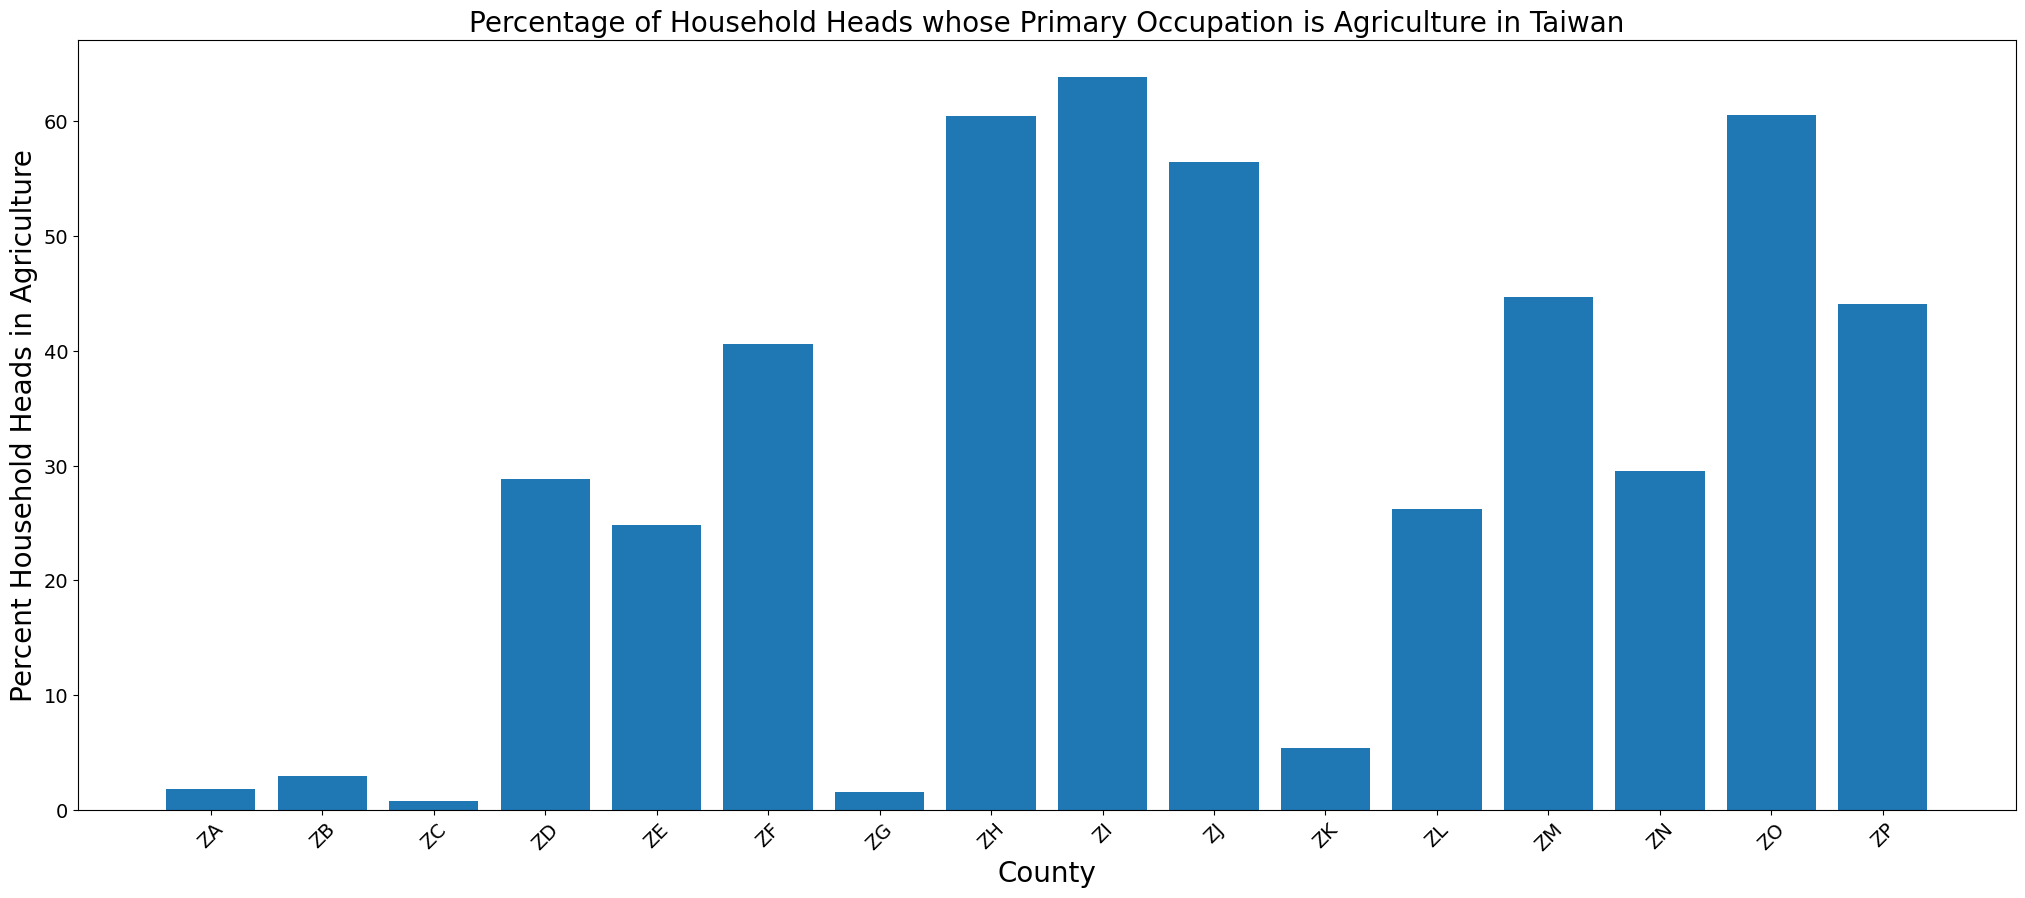

In [17]:
plt.figure(figsize=(25,10))
plt.bar(x = chtaiq['county'][(chtaiq['xiang'] == 3) & (chtaiq['sex'] == 'T')],
        height = chtaiq['q010'][(chtaiq['xiang'] == 3) & (chtaiq['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Percent Household Heads in Agriculture", fontsize=20)
plt.title('Percentage of Household Heads whose Primary Occupation is Agriculture in Taiwan', fontsize=20)
plt.show;

In [18]:
# Q012 dBUDDHIST  questionnaire PERCENTAGE WHO BELIEVE IN BUDDHIST RELIGION
# ch83q[['q012']].describe() # question DNE in this csv

In [19]:
ch89q[['q012']][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')].describe()

,q012
count,69.000000
mean,7.695652
std,14.388266
min,0.000000
25%,0.800000
50%,2.500000
75%,7.300000
max,78.800000


In [20]:
ch93q[['q012']][(ch93q['xiang'] == 3) & (ch93q['sex'] == 'T')].describe()

,q012
count,13.000000
mean,10.146154
std,20.951596
min,0.000000
25%,0.700000
50%,1.000000
75%,3.800000
max,57.800000


In [21]:
chtaiq[['q012']][(chtaiq['xiang'] == 3) & (chtaiq['sex'] == 'T')].describe()

,q012
count,16.000000
mean,28.406250
std,19.772657
min,0.000000
25%,10.525000
50%,27.550000
75%,45.300000
max,57.200000


In [22]:
# Q015 aCANREADf  questionnaire PERCENTAGE OF FEMALES WHO ARE LITERATE 
# Q016 aCANREADm  questionnaire PERCENTAGE OF MALES WHO ARE LITERATE 

# ch83q[['q015','q016']].describe()

In [23]:
ch89q[['q015','q016']][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')].describe()

,q015,q016
count,69.000000,69.000000
mean,59.608696,73.304348
std,19.129756,16.445592
min,13.000000,19.000000
25%,47.500000,62.500000
50%,59.500000,75.000000
75%,72.500000,85.000000
max,95.000000,100.000000


Literacy likely has low correlation with health. Generally looks identical between the two graphs, men and women education likely identical if not the same. Education itself likely plays a larger role if at all.

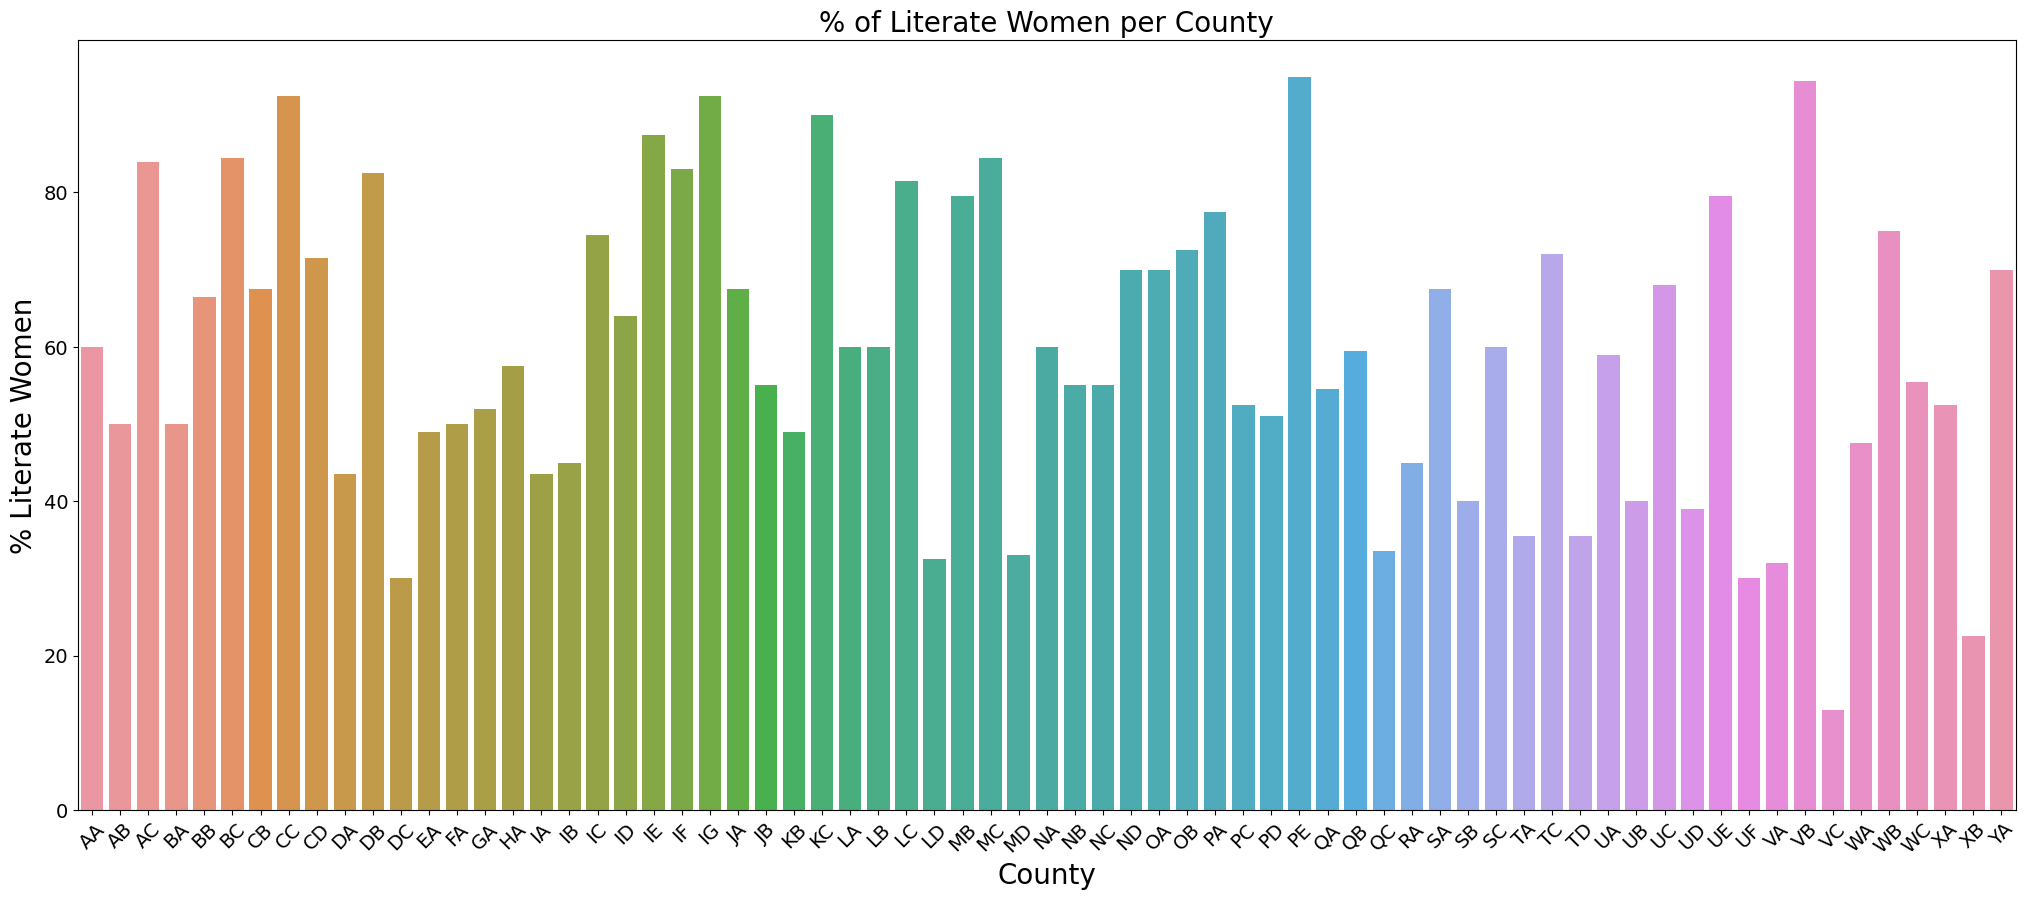

In [24]:
plt.figure(figsize=(25,10))
sns.set_palette('colorblind')
sns.barplot(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        y = ch89q['q015'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("% Literate Women", fontsize=20)
plt.title('% of Literate Women per County', fontsize=20)
plt.show;

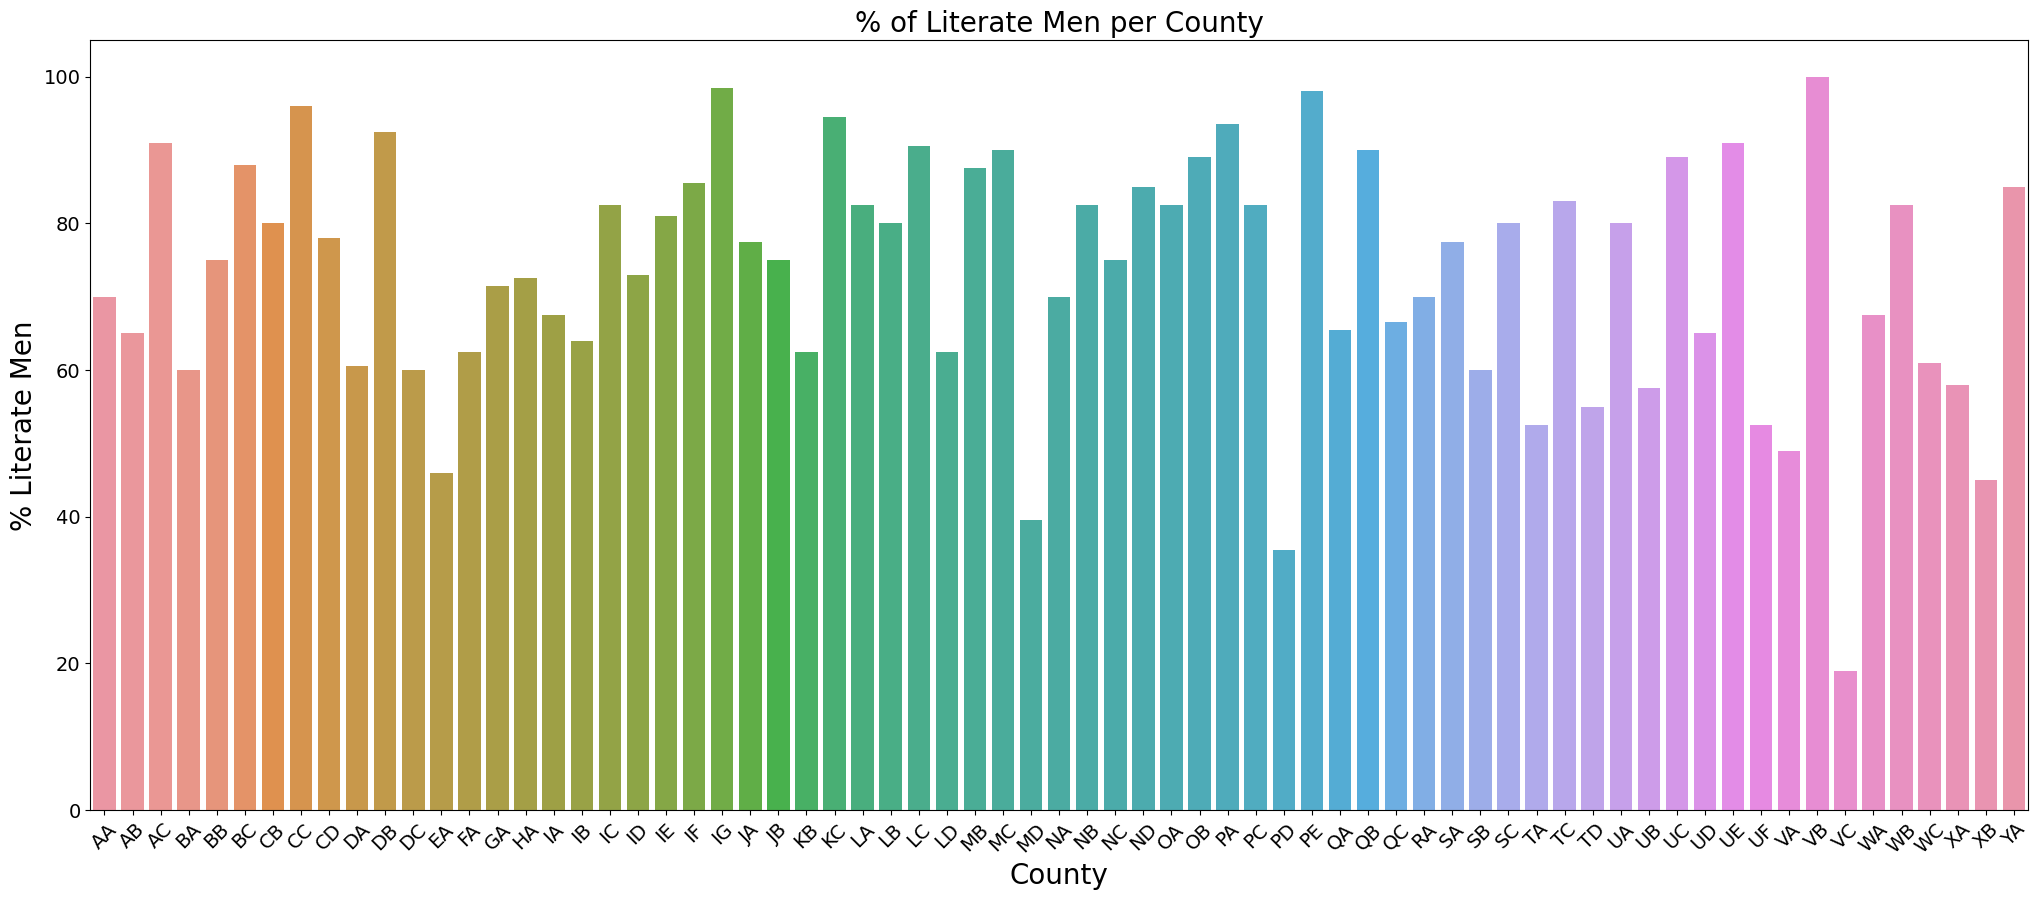

In [25]:
plt.figure(figsize=(25,10))
sns.set_palette('colorblind')
sns.barplot(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        y = ch89q['q016'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("% Literate Men", fontsize=20)
plt.title('% of Literate Men per County', fontsize=20)
plt.show;

In [26]:
# ch93q[['q015','q016']].describe()

In [27]:
# chtaiq[['q015','q016']].describe()

In [28]:
# Q022 dEDUCATED  questionnaire PERCENTAGE WHO ARE WELL-EDUCATED
# Q023 c%NOSCHL   questionnaire PERCENTAGE OF HOUSEHOLD HEADS ATTENDED NO SCHOOL  
# Q024 c%1stSCHL  questionnaire PERCENTAGE OF HOUSEHOLD HEADS ATTENDED UP TO PRIMARY SCHOOL ONLY
# Q025 c%2ndSCHL  questionnaire PERCENTAGE OF HOUSEHOLD HEADS ATTENDED UP TO JUNIOR SCHOOL ONLY
# ch83q[['q022', 'q023', 'q024', 'q025']].describe()

In [29]:
ch89q[['q022', 'q023', 'q024', 'q025']][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')].describe()

,q022,q023,q024,q025
count,69.000000,69.000000,69.000000,69.000000
mean,3.056522,28.724638,45.553623,24.653623
std,2.633186,12.371200,9.316172,9.402700
min,0.000000,4.700000,19.400000,9.300000
25%,1.600000,19.900000,38.900000,18.100000
50%,2.500000,28.300000,45.800000,23.400000
75%,4.300000,35.100000,51.700000,31.800000
max,12.500000,63.000000,64.800000,49.600000


There are few "well educated" people in in each county, some without any. Most people are educated up to junior schooling (American grade 7-9 equivalent)

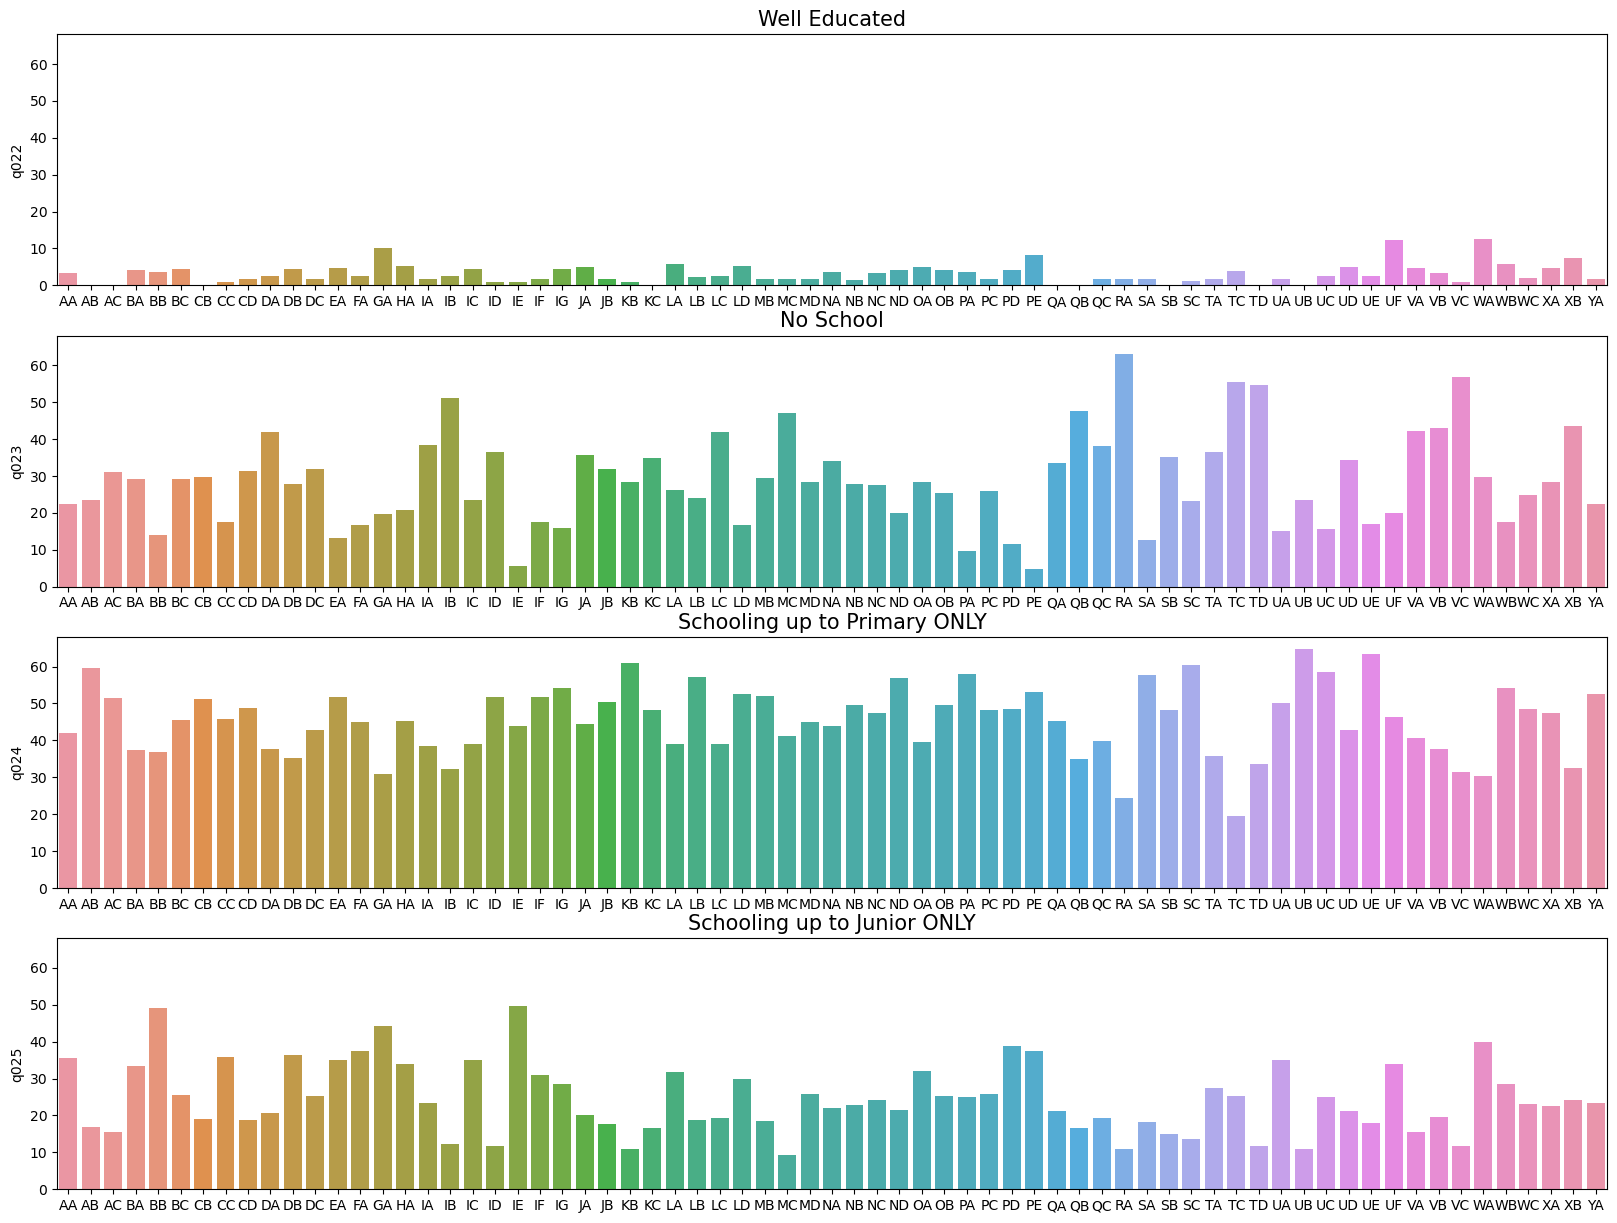

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(20, 15), sharey=True)
sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q022'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('Well Educated', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q023'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('No School', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q024'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('Schooling up to Primary ONLY', fontsize=15)
axes[2].set(xlabel=None)

sns.barplot(ax = axes[3],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q025'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[3].set_title('Schooling up to Junior ONLY', fontsize=15)
axes[3].set(xlabel=None)

plt.show;

In [31]:
# ch93q[['q022', 'q023', 'q024', 'q025']].describe()

In [32]:
chtaiq[['q022', 'q023', 'q024', 'q025']][(chtaiq['xiang'] == 3) & (chtaiq['sex'] == 'T')].describe()

,q022,q023,q024,q025
count,16.000000,16.000000,16.000000,16.000000
mean,14.450000,17.500000,49.775000,12.675000
std,8.260993,7.448042,10.589019,4.869839
min,5.200000,3.400000,33.800000,3.900000
25%,9.025000,12.125000,41.300000,10.550000
50%,12.800000,18.500000,51.400000,14.050000
75%,15.700000,22.425000,53.450000,15.250000
max,31.600000,30.000000,69.500000,20.900000


In [33]:
# Q037 cAGINC89   questionnaire HOUSEHOLD AGRICULTURAL INCOME FOR 1989 (Yuan)                                                                                                                                                                                 
# Q038 cNONAG89   questionnaire HOUSEHOLD NON-AGRICULTURAL INCOME FOR 1989 (Yuan)                                                                                                                                                                           
# Q039 cSUPINC89  questionnaire HOUSEHOLD SIDELINE AND BUSINESS INCOME FOR 1989 (Yuan)
# ch83q[['q037','q038','q039']].describe()
ch89q[['q037','q038','q039']][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')].describe()

,q037,q038,q039
count,69.000000,69.000000,69.000000
mean,2160.971014,1053.057971,766.492754
std,1024.270185,880.664804,512.418534
min,691.000000,63.000000,96.000000
25%,1452.000000,427.000000,402.000000
50%,2010.000000,726.000000,597.000000
75%,2562.000000,1414.000000,1026.000000
max,7238.000000,3925.000000,2339.000000


[Text(0.5, 0, '')]

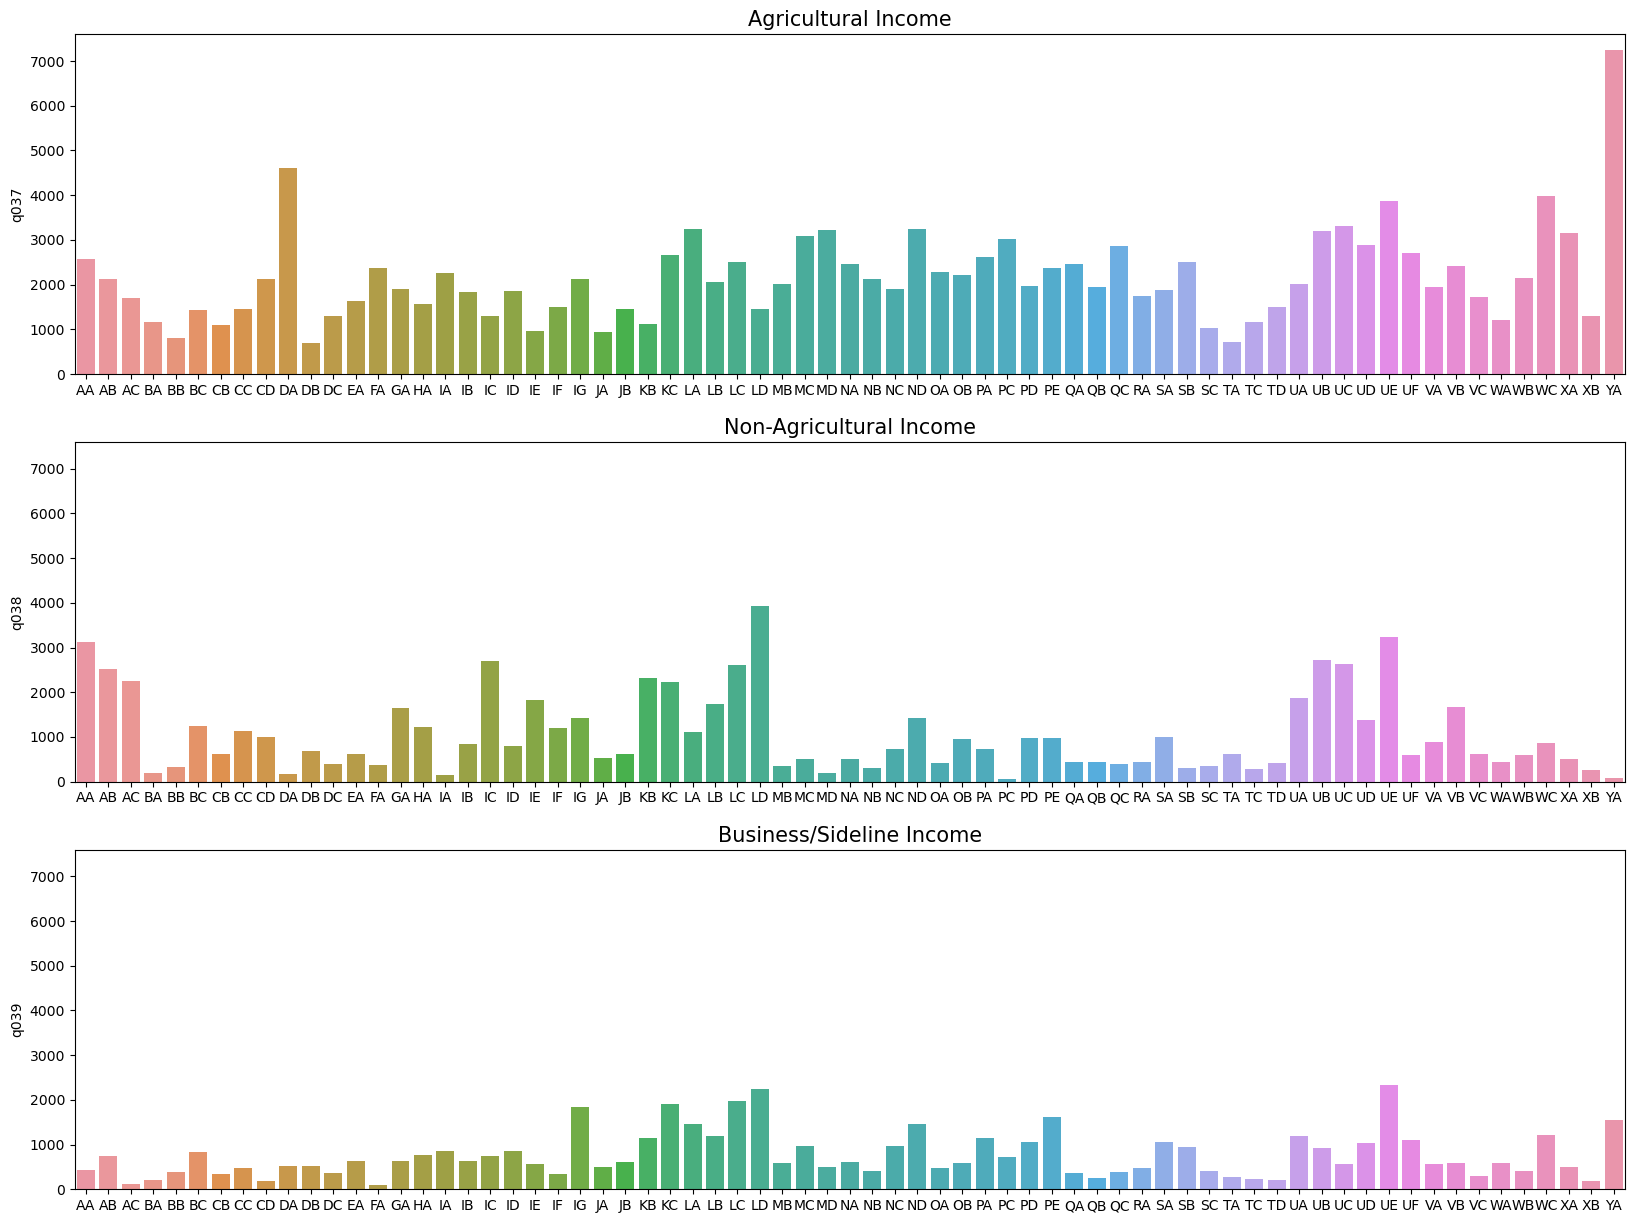

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharey=True)
sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q037'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('Agricultural Income', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q038'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('Non-Agricultural Income', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q039'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('Business/Sideline Income', fontsize=15)
axes[2].set(xlabel=None)

Visualizing the income information to see if there's a huge disparity between the xiangs. There's a relatively even distribution of agricultural income in every area but a much larger variation for non-agricultural income. 

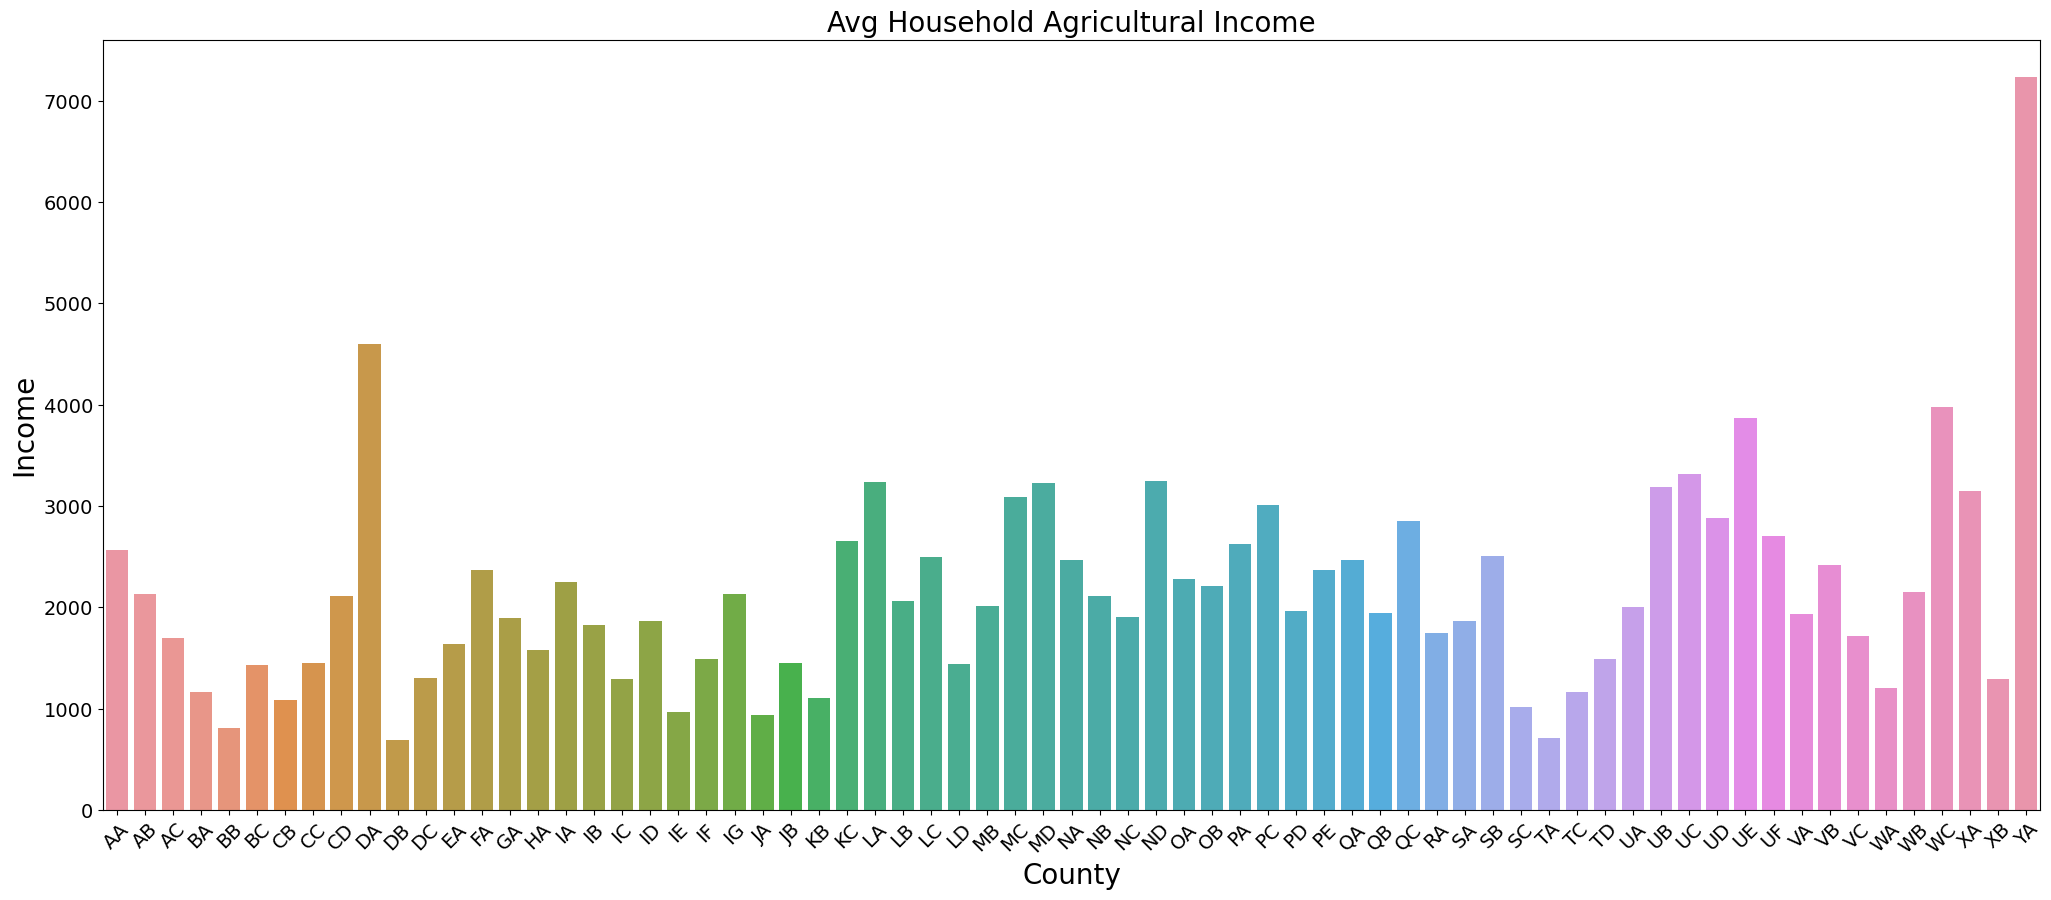

In [35]:
plt.figure(figsize=(25,10))
sns.set_palette('colorblind')
sns.barplot(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        y = ch89q['q037'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Income", fontsize=20)
plt.title('Avg Household Agricultural Income', fontsize=20)
plt.show;

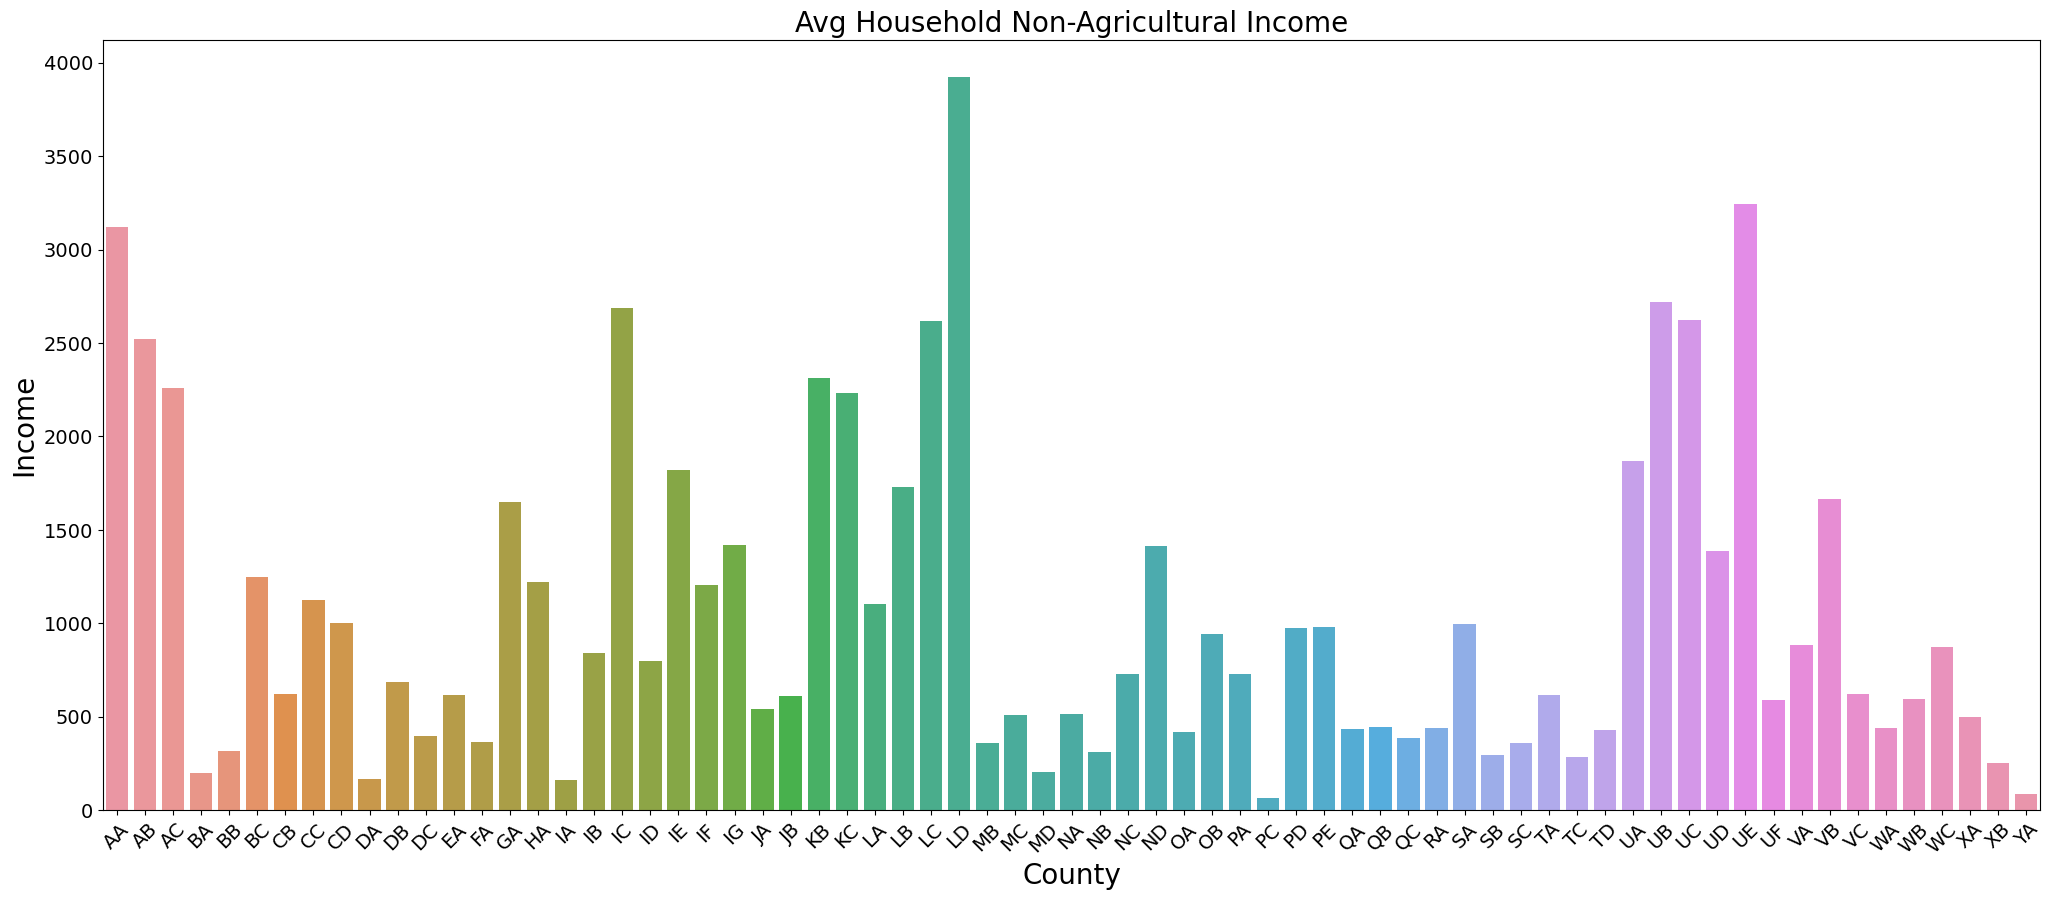

In [36]:
plt.figure(figsize=(25,10))
sns.set_palette('colorblind')
sns.barplot(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        y = ch89q['q038'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Income", fontsize=20)
plt.title('Avg Household Non-Agricultural Income', fontsize=20)
plt.show;

In [37]:
# ch93q[['q037','q038','q039']].describe()
# chtaiq[['q037','q038','q039']].describe()

In [38]:
# Q040 c%INCALC   questionnaire PERCENTAGE OF 1989 HOUSEHOLD INCOME SPENT ON ALCOHOL                                                                                                                                                                           
# Q041 c%INCCLTH  questionnaire PERCENTAGE OF 1989 HOUSEHOLD INCOME SPENT ON CLOTHING                                                                                                                                                                   
# Q042 c%INCSMOK  questionnaire PERCENTAGE OF 1989 HOUSEHOLD INCOME SPENT ON SMOKING 
# ch83q[['q040','q041','q042']].describe()
ch89q[['q040','q041','q042']].describe()

,q040,q041,q042
count,207.000000,207.000000,207.000000
mean,2.425604,6.499034,2.842029
std,3.019125,5.607658,1.905312
min,0.000000,0.900000,0.200000
25%,0.900000,3.000000,1.450000
50%,1.600000,4.700000,2.400000
75%,2.700000,8.100000,3.700000
max,21.500000,35.900000,13.000000


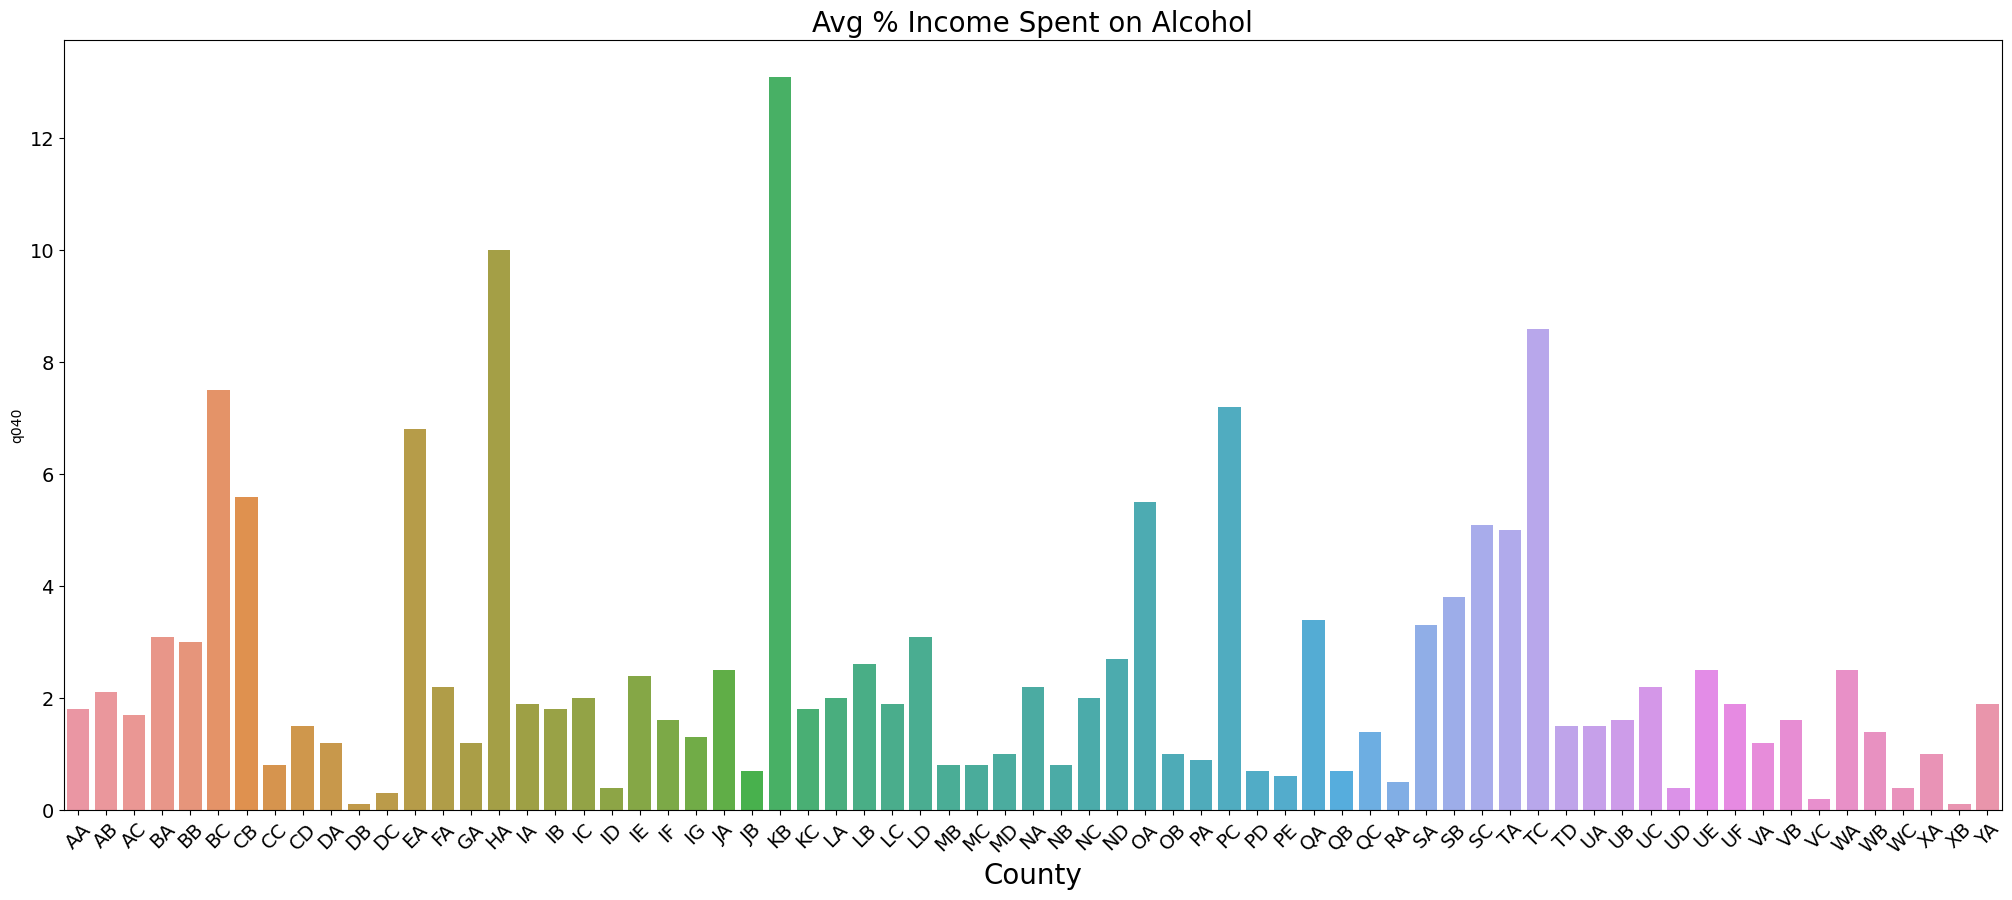

In [39]:
plt.figure(figsize=(25,10))
sns.set_palette('colorblind')
sns.barplot(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        y = ch89q['q040'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
# plt.ylabel("% Income Spent on Alcohol", fontsize=20)
plt.title('Avg % Income Spent on Alcohol', fontsize=20)
plt.show;

In [40]:
# ch93q[['q040','q041','q042']].describe()
# chtaiq[['q040','q041','q042']].describe()

In [41]:
# Q069 dUNVENT    questionnaire PERCENTAGE WITH UNVENTED STOVE IN HOUSEHOLD
# Q070 aAGRICUL   questionnaire PER CAPITA AGRICULTURAL PRODUCTION (Yuan)
# Q071 aINDUSTRY  questionnaire PER CAPITA INDUSTRIAL PRODUCTION (Yuan)
# Q082 c%OWNPIG   questionnaire PERCENTAGE OF HOUSEHOLDS THAT REAR PIGS                                                                                                                                                                                         
# Q083 bPIGS      questionnaire NUMBER OF PIGS (per household)
# Q084 c%POULTRY  questionnaire PERCENTAGE OF HOUSEHOLDS THAT REAR POULTRY  
# ch83q[['q069','q070','q071', 'q082', 'q083', 'q084']].describe()
ch89q[['q069','q070','q071', 'q082', 'q083', 'q084']].describe()

,q069,q070,q071,q082,q083,q084
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,22.631884,607.038647,838.995169,64.835749,1.700483,76.097101
std,25.085070,537.694926,1338.322158,31.538538,1.221344,20.391374
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,3.300000,279.000000,101.000000,41.350000,0.765000,65.100000
50%,11.500000,447.000000,232.000000,79.200000,1.490000,82.800000
75%,36.900000,675.000000,978.500000,91.400000,2.400000,91.650000
max,93.500000,2788.000000,6859.000000,100.000000,5.770000,98.500000


In [42]:
# ch93q[['q069','q070','q071', 'q082', 'q083', 'q084']].describe()
# chtaiq[['q069','q070','q071', 'q082', 'q083', 'q084']].describe()

In [43]:
# Q087 aHOSPBED   questionnaire NUMBER OF HOSPITAL BEDS (per 10,000 pop)                                                                                                                                                                                       
# Q088 aDOCTORS   questionnaire NUMBER OF DOCTORS WITH OFFICES PER 10,000 POPULATION                                                                                                                                                                          
# Q089 dAGE       questionnaire AGE AT INTERVIEW (years)
# ch83q[['q087','q088','q089']].describe()
ch89q[['q087','q088','q089']].describe()

,q087,q088,q089
count,207.000000,207.000000,483.000000
mean,10.510145,8.722705,47.768116
std,7.525474,6.434707,1.954986
min,0.000000,0.000000,40.400000
25%,5.000000,3.650000,46.900000
50%,10.000000,7.000000,48.100000
75%,15.000000,11.950000,49.100000
max,40.000000,38.400000,53.000000


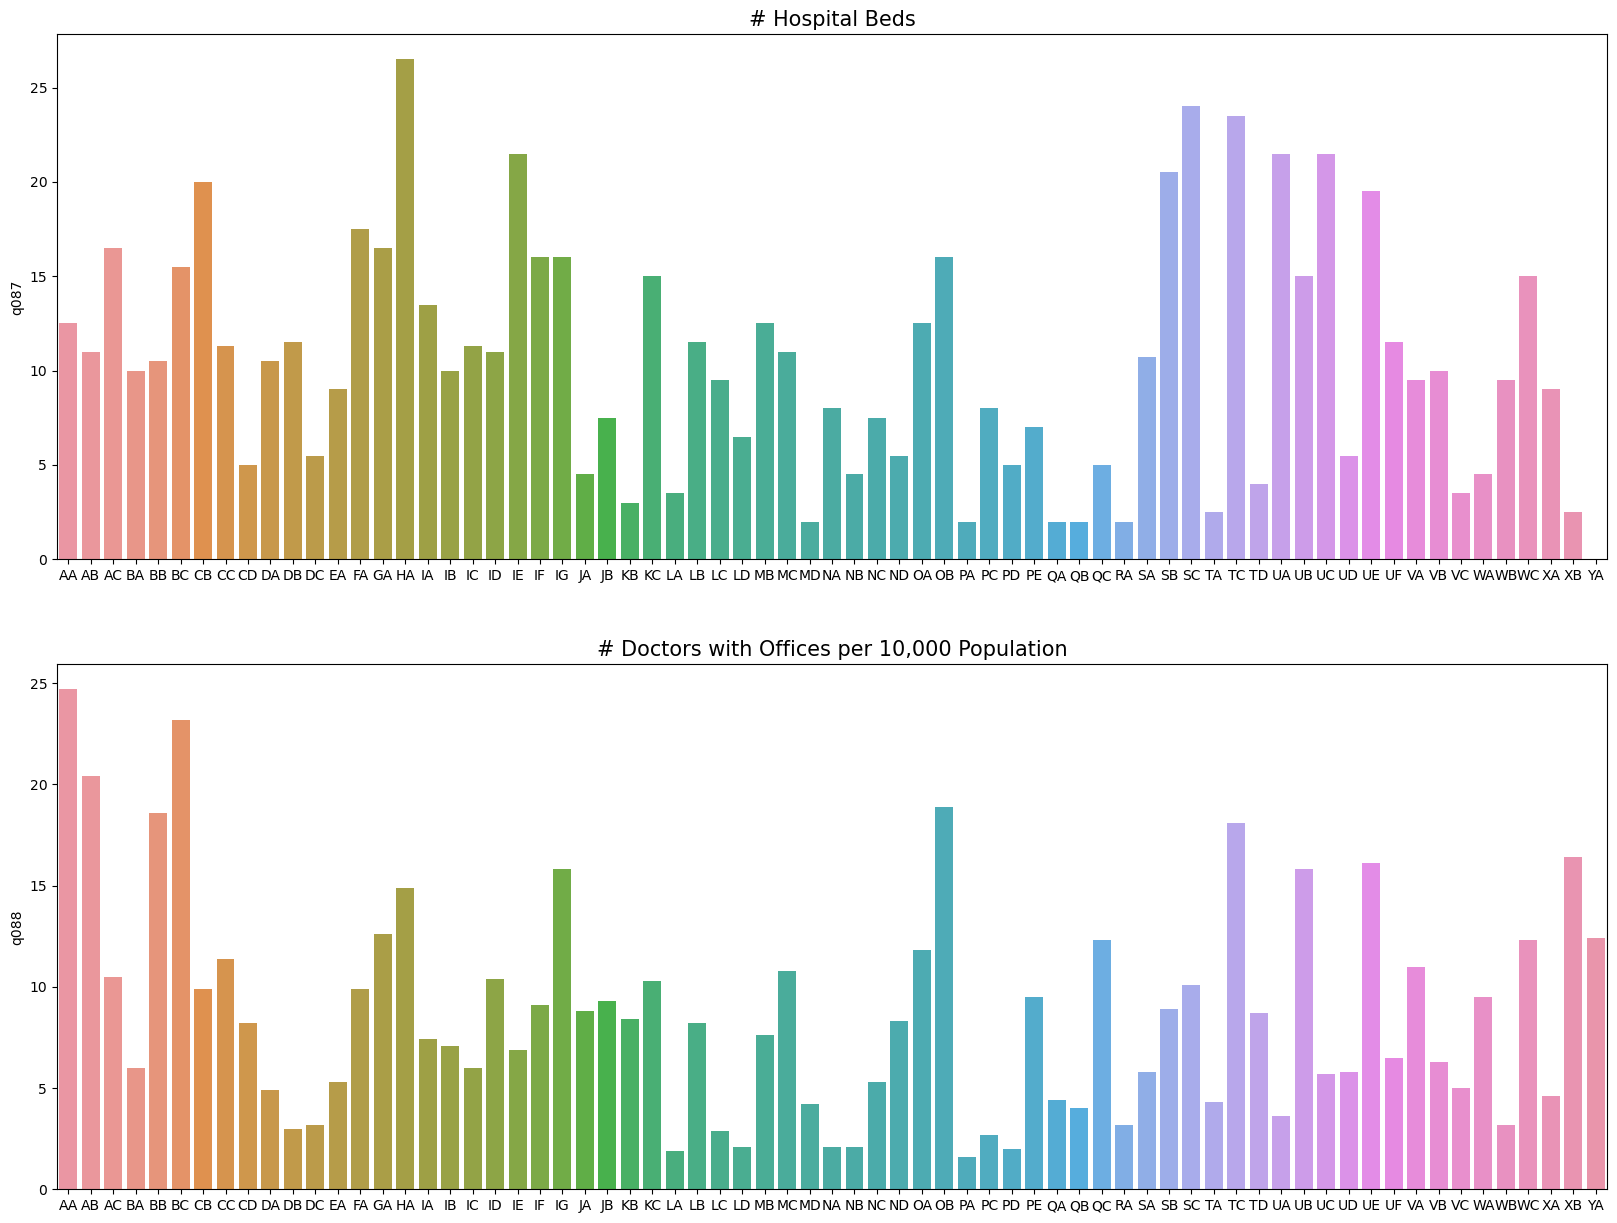

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q087'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('# Hospital Beds', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q088'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('# Doctors with Offices per 10,000 Population', fontsize=15)
axes[1].set(xlabel=None)

plt.show;

In [45]:
# ch93q[['q087','q088','q089']].describe()
# chtaiq[['q087','q088','q089']].describe()

In [46]:
# Q090 dHEIGHT    questionnaire HEIGHT (cm.)                                                                                                                                                                                                                   
# Q091 dWEIGHT    questionnaire WEIGHT (kg.)                                                                                                                                                                                                                   
# Q092 dBMI       questionnaire BODY MASS INDEX (kg/m**2) 
# Female
ch83q[['q090','q091','q092']].loc[ch89q['sex']=='F'].describe()

,q090,q091,q092
count,192.000000,192.000000,192.000000
mean,153.645833,48.625000,20.598958
std,2.539651,3.252949,1.039734
min,148.000000,42.500000,18.100000
25%,151.750000,45.900000,19.900000
50%,154.000000,48.550000,20.550000
75%,155.250000,50.800000,21.200000
max,161.000000,57.800000,23.600000


In [47]:
ch89q[['q090','q091','q092']].loc[ch89q['sex']=='F'].describe()

,q090,q091,q092
count,207.000000,207.000000,207.000000
mean,154.217391,50.992754,21.440097
std,2.735258,4.108385,1.223034
min,146.000000,42.200000,18.700000
25%,152.500000,47.300000,20.550000
50%,154.000000,50.800000,21.400000
75%,156.000000,54.450000,22.500000
max,164.000000,62.800000,25.000000


What is the most surpising thing is how consistent the average weight and height of each county is.

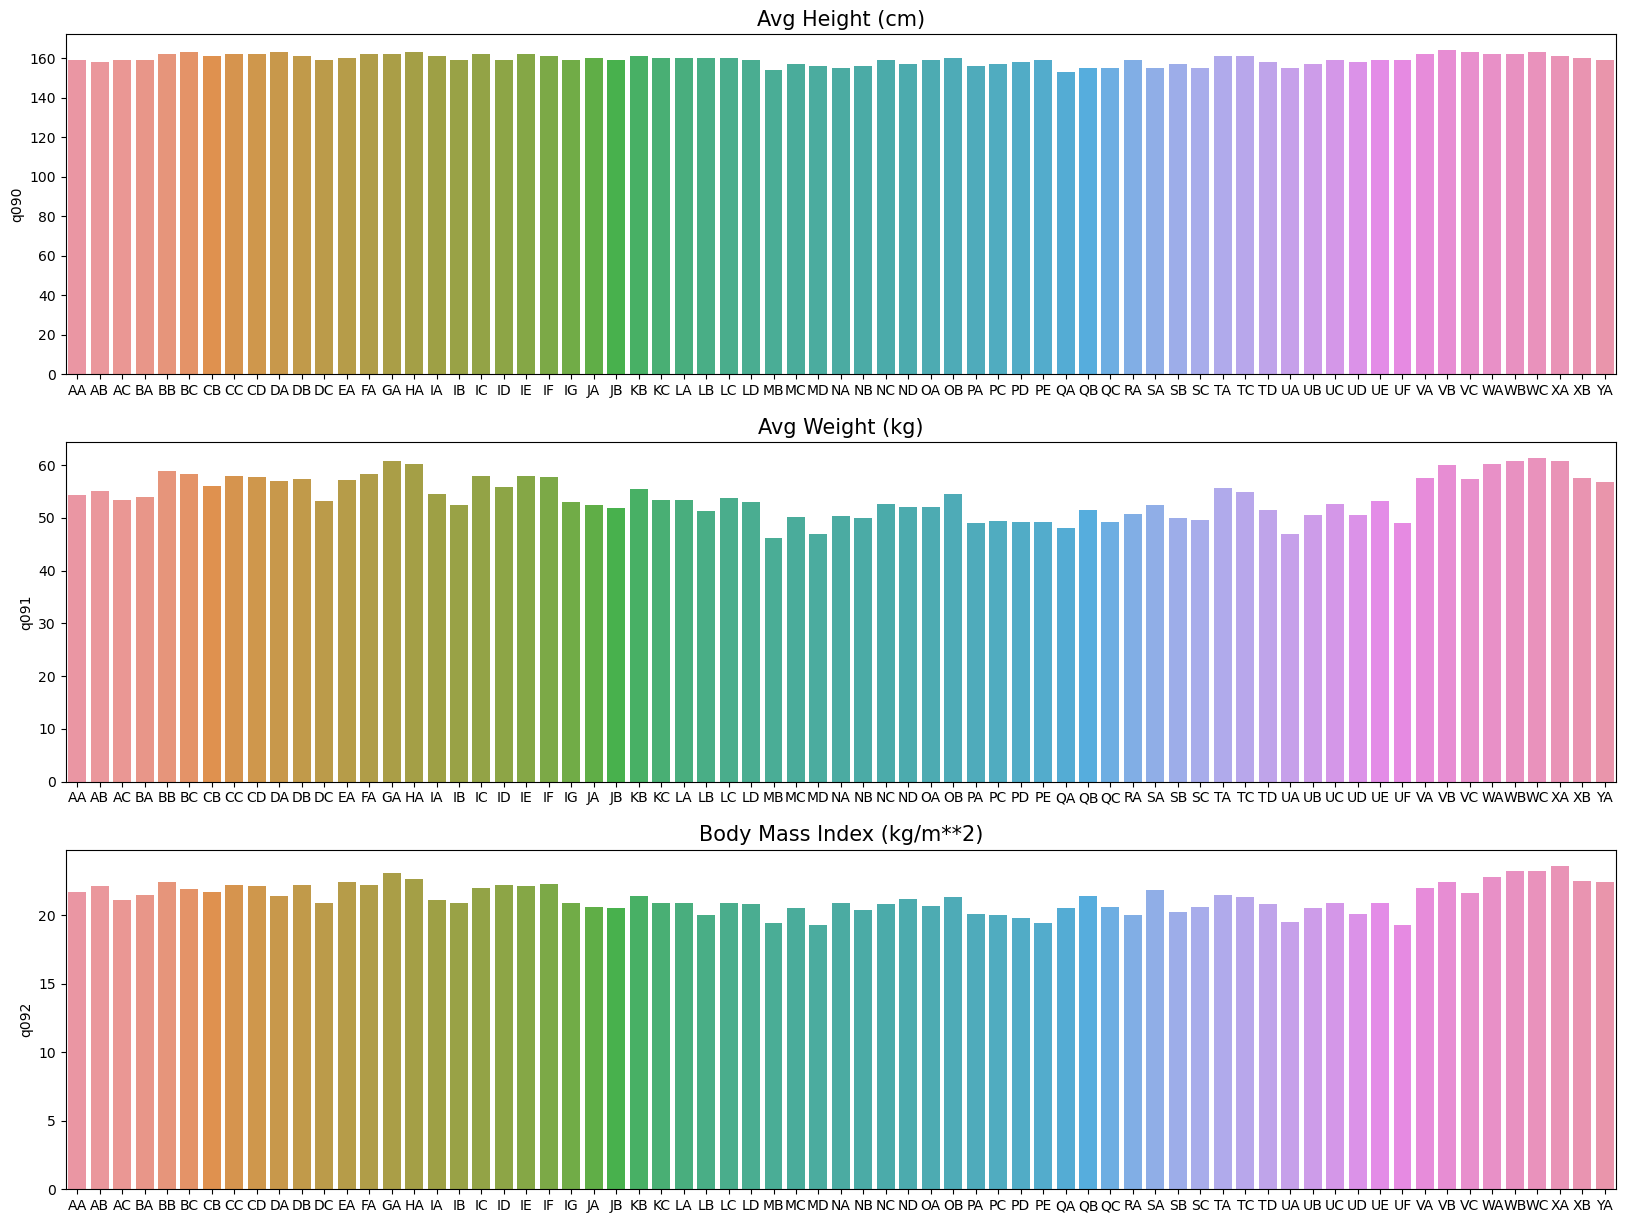

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q090'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('Avg Height (cm)', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q091'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('Avg Weight (kg)', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q092'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('Body Mass Index (kg/m**2)', fontsize=15)
axes[2].set(xlabel=None)


plt.show;

In [49]:
ch93q[['q090','q091','q092']].loc[ch89q['sex']=='F'].describe()

,q090,q091,q092
count,39.000000,39.000000,39.000000
mean,154.000000,52.941026,22.305128
std,2.259483,4.904333,1.616844
min,148.000000,45.300000,19.300000
25%,153.000000,50.250000,21.200000
50%,154.000000,51.800000,21.700000
75%,156.000000,56.300000,23.500000
max,158.000000,64.100000,26.400000


In [50]:
chtaiq[['q090','q091','q092']].loc[ch89q['sex']=='F'].describe()

,q090,q091,q092
count,48.000000,48.000000,48.000000
mean,153.791667,58.114583,24.610417
std,1.749873,1.932476,1.036820
min,150.000000,53.500000,22.400000
25%,153.000000,56.675000,23.900000
50%,154.000000,58.650000,24.400000
75%,155.000000,59.125000,25.125000
max,157.000000,63.600000,27.100000


In [51]:
# Male
ch83q[['q090','q091','q092']].loc[ch89q['sex']=='M'].describe()

,q090,q091,q092
count,192.000000,192.000000,192.000000
mean,163.734375,54.916146,20.498958
std,2.824216,3.362528,0.818567
min,158.000000,48.400000,18.300000
25%,162.000000,52.300000,20.000000
50%,164.000000,54.800000,20.400000
75%,165.250000,57.100000,21.000000
max,170.000000,66.100000,23.700000


In [52]:
ch89q[['q090','q091','q092']].loc[ch89q['sex']=='M'].describe()

,q090,q091,q092
count,207.000000,207.000000,207.000000
mean,164.352657,56.884058,21.053623
std,2.760027,4.083246,1.036740
min,157.000000,49.000000,18.700000
25%,162.000000,53.750000,20.300000
50%,165.000000,56.500000,21.000000
75%,166.000000,60.300000,21.900000
max,170.000000,67.500000,23.900000


In [53]:
ch93q[['q090','q091','q092']].loc[ch89q['sex']=='M'].describe()

,q090,q091,q092
count,39.000000,39.000000,39.000000
mean,164.358974,57.876923,21.420513
std,2.539034,3.776831,0.914842
min,158.000000,51.500000,19.700000
25%,163.000000,55.400000,20.700000
50%,165.000000,57.200000,21.300000
75%,166.000000,60.600000,22.150000
max,169.000000,65.600000,23.000000


In [54]:
chtaiq[['q090','q091','q092']].loc[ch89q['sex']=='M'].describe()

,q090,q091,q092
count,48.000000,48.00000,48.000000
mean,164.666667,64.94375,23.997917
std,2.035152,2.35940,0.879673
min,158.000000,59.60000,22.300000
25%,164.000000,63.45000,23.400000
50%,165.000000,65.15000,23.900000
75%,166.000000,66.15000,24.500000
max,168.000000,70.40000,26.300000


In [55]:
# Q093 dPEPULCER  questionnaire PERCENTAGE WITH HISTORY OF PEPTIC ULCER DIAGNOSIS                                                                                                                                                                            
# Q094 dHEPATIT   questionnaire PERCENTAGE WITH HISTORY OF HEPATITIS DIAGNOSIS                                                                                                                                                                                  
# Q095 dSCHISTO   questionnaire PERCENTAGE WITH HISTORY OF SCHISTOSOMIASIS DIAGNOSIS                                                                                                                                                                           
# Q096 dMALARIA   questionnaire PERCENTAGE WITH HISTORY OF MALARIA DIAGNOSIS                                                                                                                                                                                   
# Q097 dARTHRIT   questionnaire PERCENTAGE WITH HISTORY OF ARTHRITIS DIAGNOSIS                                                                                                                                                                                  
# Q098 dTHYROID   questionnaire PERCENTAGE WITH ABNORMAL THYROID GLAND

# ch83q[['q093','q094','q095', 'q096', 'q097', 'q098']].describe()
ch89q[['q093','q094','q095', 'q096', 'q097', 'q098']].describe()

,q093,q094,q095,q096,q097,q098
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,6.223395,4.731677,4.051346,7.362733,8.183023,3.071636
std,6.225687,4.777155,15.653669,11.904216,8.174200,6.303707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.600000,0.000000,0.000000,0.000000,2.950000,0.000000
50%,4.200000,3.300000,0.000000,2.900000,6.700000,0.000000
75%,9.550000,7.100000,0.000000,10.000000,11.000000,3.300000
max,36.700000,30.000000,96.700000,70.000000,53.600000,53.300000


Malaria seems to have a huge impact in select counties

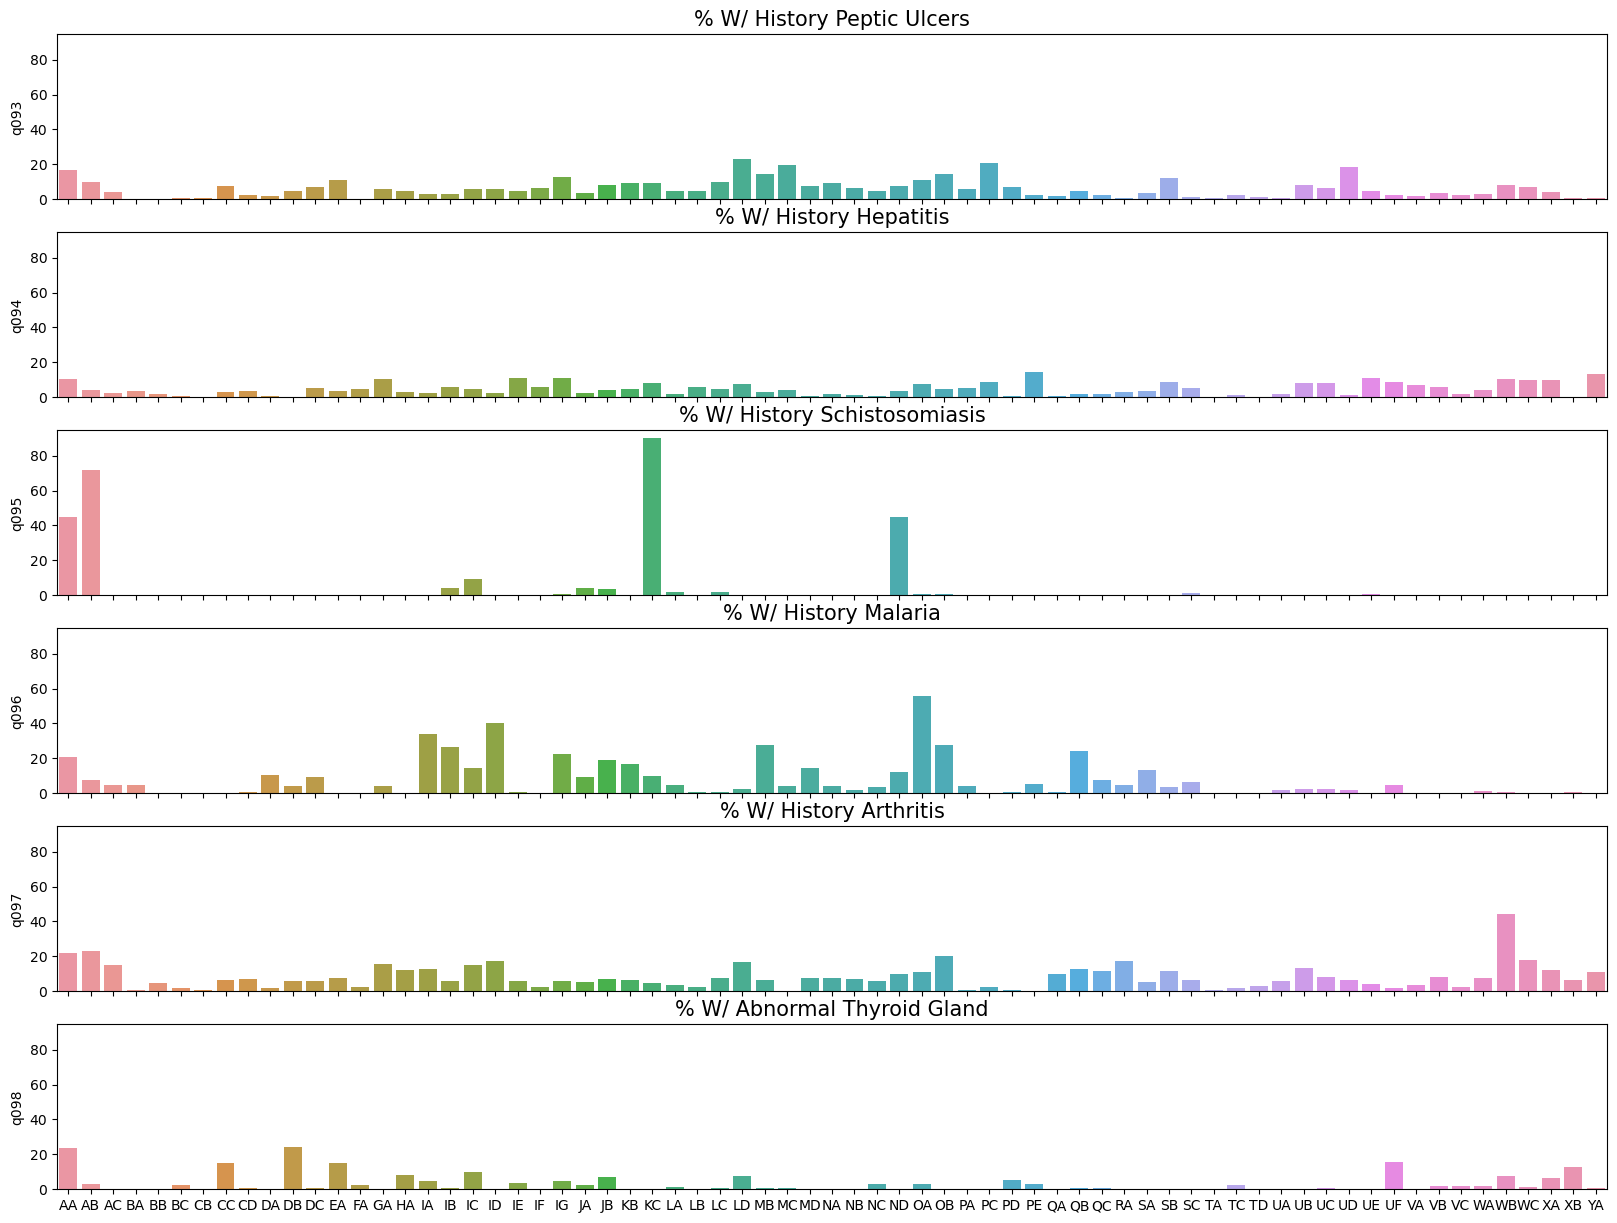

In [56]:
fig, axes = plt.subplots(6, 1, figsize=(20, 15), sharey=True, sharex=True)
sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q093'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('% W/ History Peptic Ulcers', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q094'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('% W/ History Hepatitis', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q095'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('% W/ History Schistosomiasis', fontsize=15)
axes[2].set(xlabel=None)

sns.barplot(ax = axes[3],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q096'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[3].set_title('% W/ History Malaria', fontsize=15)
axes[3].set(xlabel=None)

sns.barplot(ax = axes[4],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q097'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[4].set_title('% W/ History Arthritis', fontsize=15)
axes[4].set(xlabel=None)

sns.barplot(ax = axes[5],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q098'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[5].set_title('% W/ Abnormal Thyroid Gland', fontsize=15)
axes[5].set(xlabel=None)

plt.show;

In [57]:
# ch93q[['q093','q094','q095', 'q096', 'q097', 'q098']].describe()
chtaiq[['q093','q094','q095', 'q096', 'q097', 'q098']].describe()

,q093,q094,q095,q096,q097,q098
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,10.319643,5.410714,0.044643,2.174107,7.239286,1.283036
std,7.102757,5.181557,0.309559,3.091393,6.245710,1.816733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.075000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,9.100000,4.450000,0.000000,0.000000,6.050000,0.000000
75%,12.850000,8.800000,0.000000,3.000000,9.700000,3.000000
max,39.400000,24.200000,2.900000,12.100000,30.300000,9.700000


In [58]:
# Q099 dBRTHFAST  questionnaire PERCENTAGE WHO SUFFER BREATHLESSNESS WHEN HURRYING OR WALKING UPHILL                                                                                                                                                           
# Q100 dBRTHLEV   questionnaire PERCENTAGE WHO SUFFER BREATHLESSNESS WHEN WALKING WITH OTHERS ON LEVEL GROUND                                                                                                                                                  
# Q101 dBRTHOWN   questionnaire PERCENTAGE WHO SUFFER BREATHLESSNESS WHEN WALKING AT OWN PACE ON LEVEL GROUND
# ch83q[['q099','q100','q101']].describe()
ch89q[['q099','q100','q101']].describe()

,q099,q100,q101
count,483.000000,483.000000,483.000000
mean,18.882402,9.785714,7.662733
std,11.202382,7.743037,7.542184
min,0.000000,0.000000,0.000000
25%,10.300000,3.400000,3.250000
50%,16.700000,8.000000,5.800000
75%,25.750000,13.450000,10.700000
max,66.700000,46.700000,58.300000


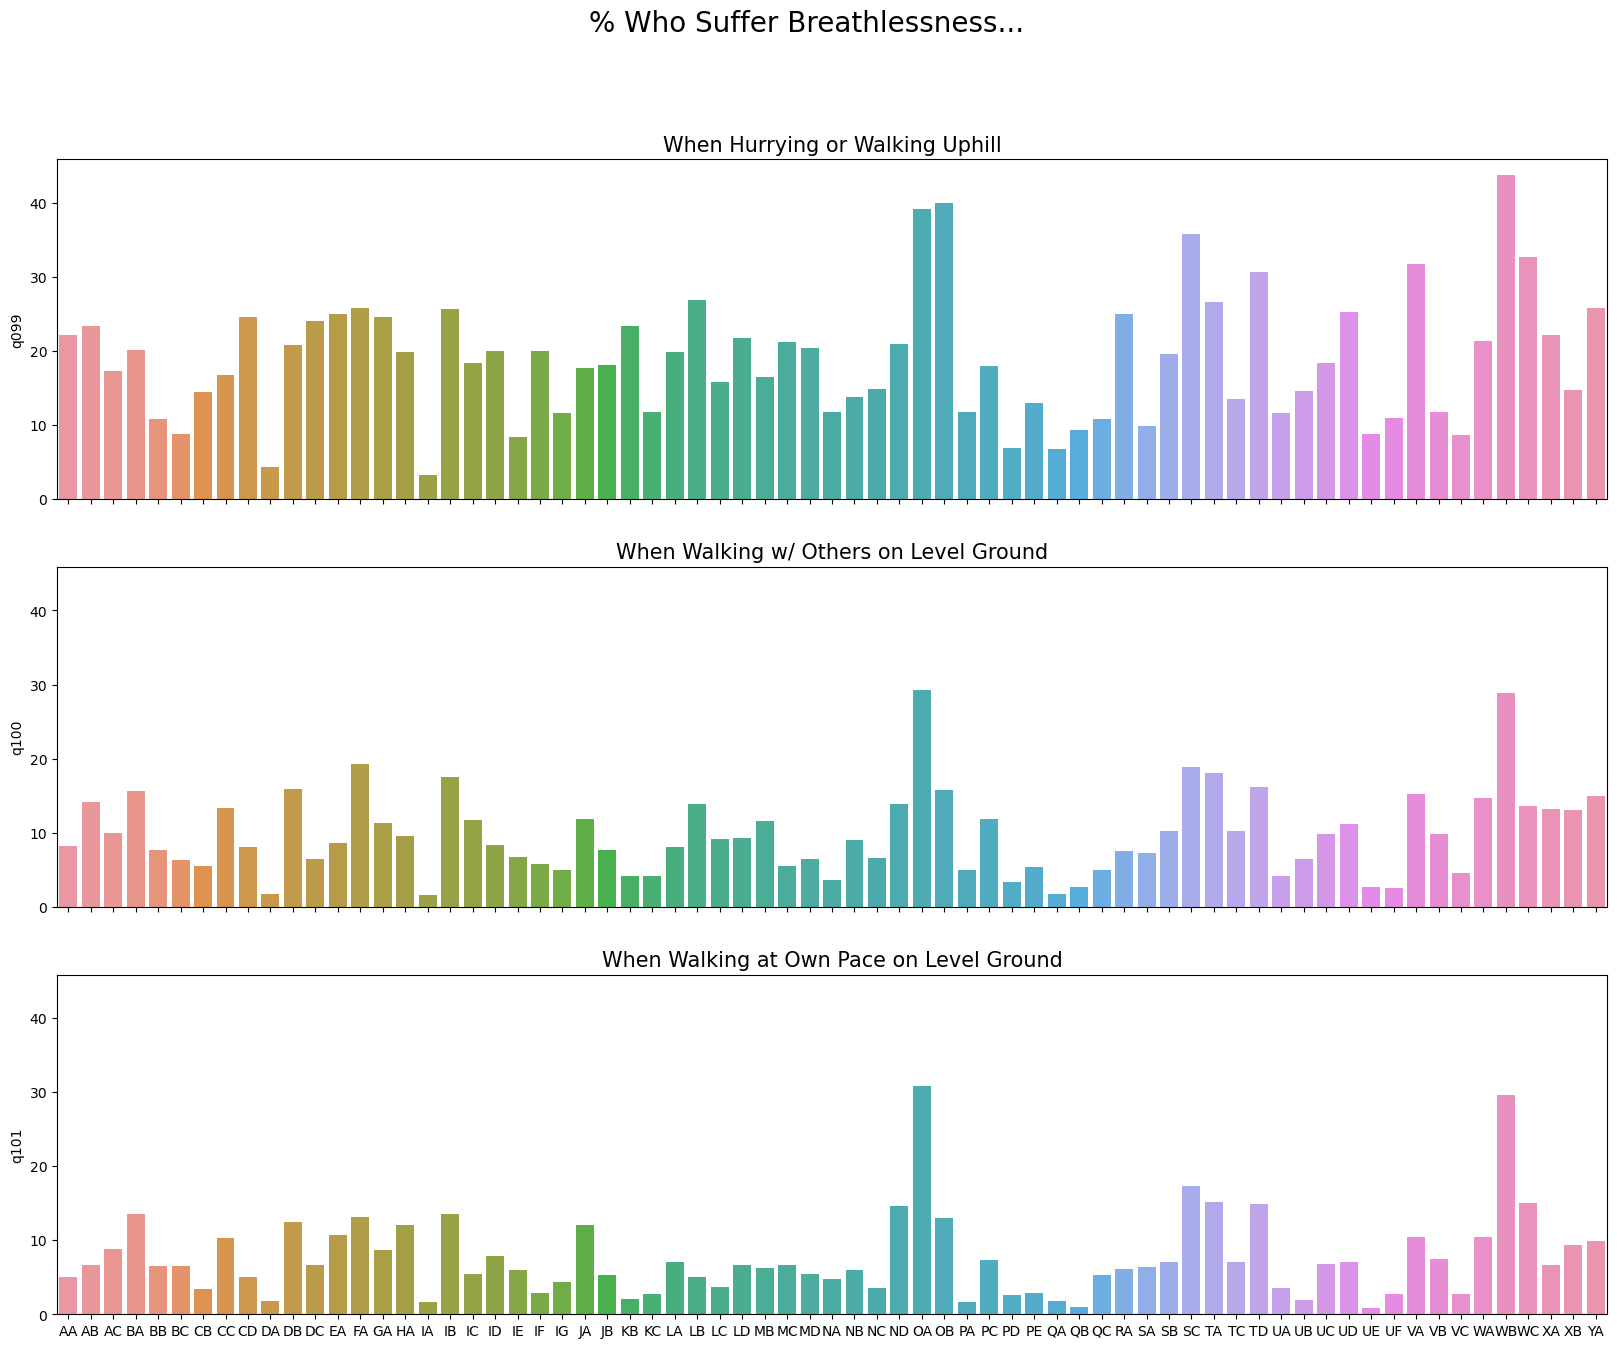

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharey=True, sharex=True)
fig.suptitle('% Who Suffer Breathlessness...', fontsize=20)
sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q099'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('When Hurrying or Walking Uphill', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q100'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('When Walking w/ Others on Level Ground', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q101'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('When Walking at Own Pace on Level Ground', fontsize=15)
axes[2].set(xlabel=None)

plt.show();

In [60]:
ch93q[['q099','q100','q101']].describe()

,q099,q100,q101
count,91.000000,91.000000,91.000000
mean,21.393407,12.878022,9.645055
std,12.390308,10.024235,8.950261
min,0.000000,0.000000,0.000000
25%,12.150000,6.400000,3.400000
50%,18.400000,10.000000,6.900000
75%,31.250000,19.150000,14.800000
max,51.700000,41.200000,35.500000


In [61]:
chtaiq[['q099','q100','q101']].describe()

,q099,q100,q101
count,112.000000,112.000000,112.000000
mean,32.145536,8.021429,4.400000
std,12.180526,5.718603,3.963937
min,3.000000,0.000000,0.000000
25%,24.200000,3.575000,1.400000
50%,30.650000,6.250000,3.200000
75%,39.400000,11.800000,6.100000
max,68.600000,28.100000,18.800000


In [62]:
# Q102 dPHLEGMw   questionnaire PERCENTAGE WHO COUGH UP PHLEGM MOST MORNINGS IN WINTER                                                                                                                                                                         
# Q103 dPHLEGMs   questionnaire PERCENTAGE WHO COUGH UP PHLEGM MOST MORNINGS IN SUMMER                                                                                                                                                                          
# Q104 dPHLEGM    questionnaire PERCENTAGE WHO COUGH UP PHLEGM FOR 3 OR MORE CONSECUTIVE MONTHS EACH YEAR                                                                                                                                                      
# Q105 dPHLEGMyr  questionnaire NUMBER OF YEARS TROUBLED BY PHLEGM (years)                                                                                                                                                                                    
# Q106 dWHEEZE    questionnaire PERCENTAGE WHOSE CHEST OFTEN SOUNDS WHEEZY                                                                                                                                                                                     
# Q107 dWHZBRTH   questionnaire PERCENTAGE EVER HAD AN ATTACK OF WHEEZING CAUSING BREATHLESSNESS 
# ch83q[['q102','q103','q104', 'q105', 'q106', 'q107']].describe()
ch89q[['q102','q103','q104', 'q105', 'q106', 'q107']].describe()

,q102,q103,q104,q105,q106,q107
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,15.005590,7.767495,9.054037,1.078054,8.731884,4.884058
std,10.054954,6.619884,7.304032,1.013588,6.919788,4.484317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.200000,3.200000,3.600000,0.300000,3.400000,1.600000
50%,13.300000,6.700000,7.500000,0.800000,7.100000,3.600000
75%,20.500000,11.400000,11.750000,1.600000,11.650000,6.700000
max,60.600000,38.100000,48.500000,5.900000,50.000000,29.200000


Looks to be a pattern of phlegm to wheeziness.

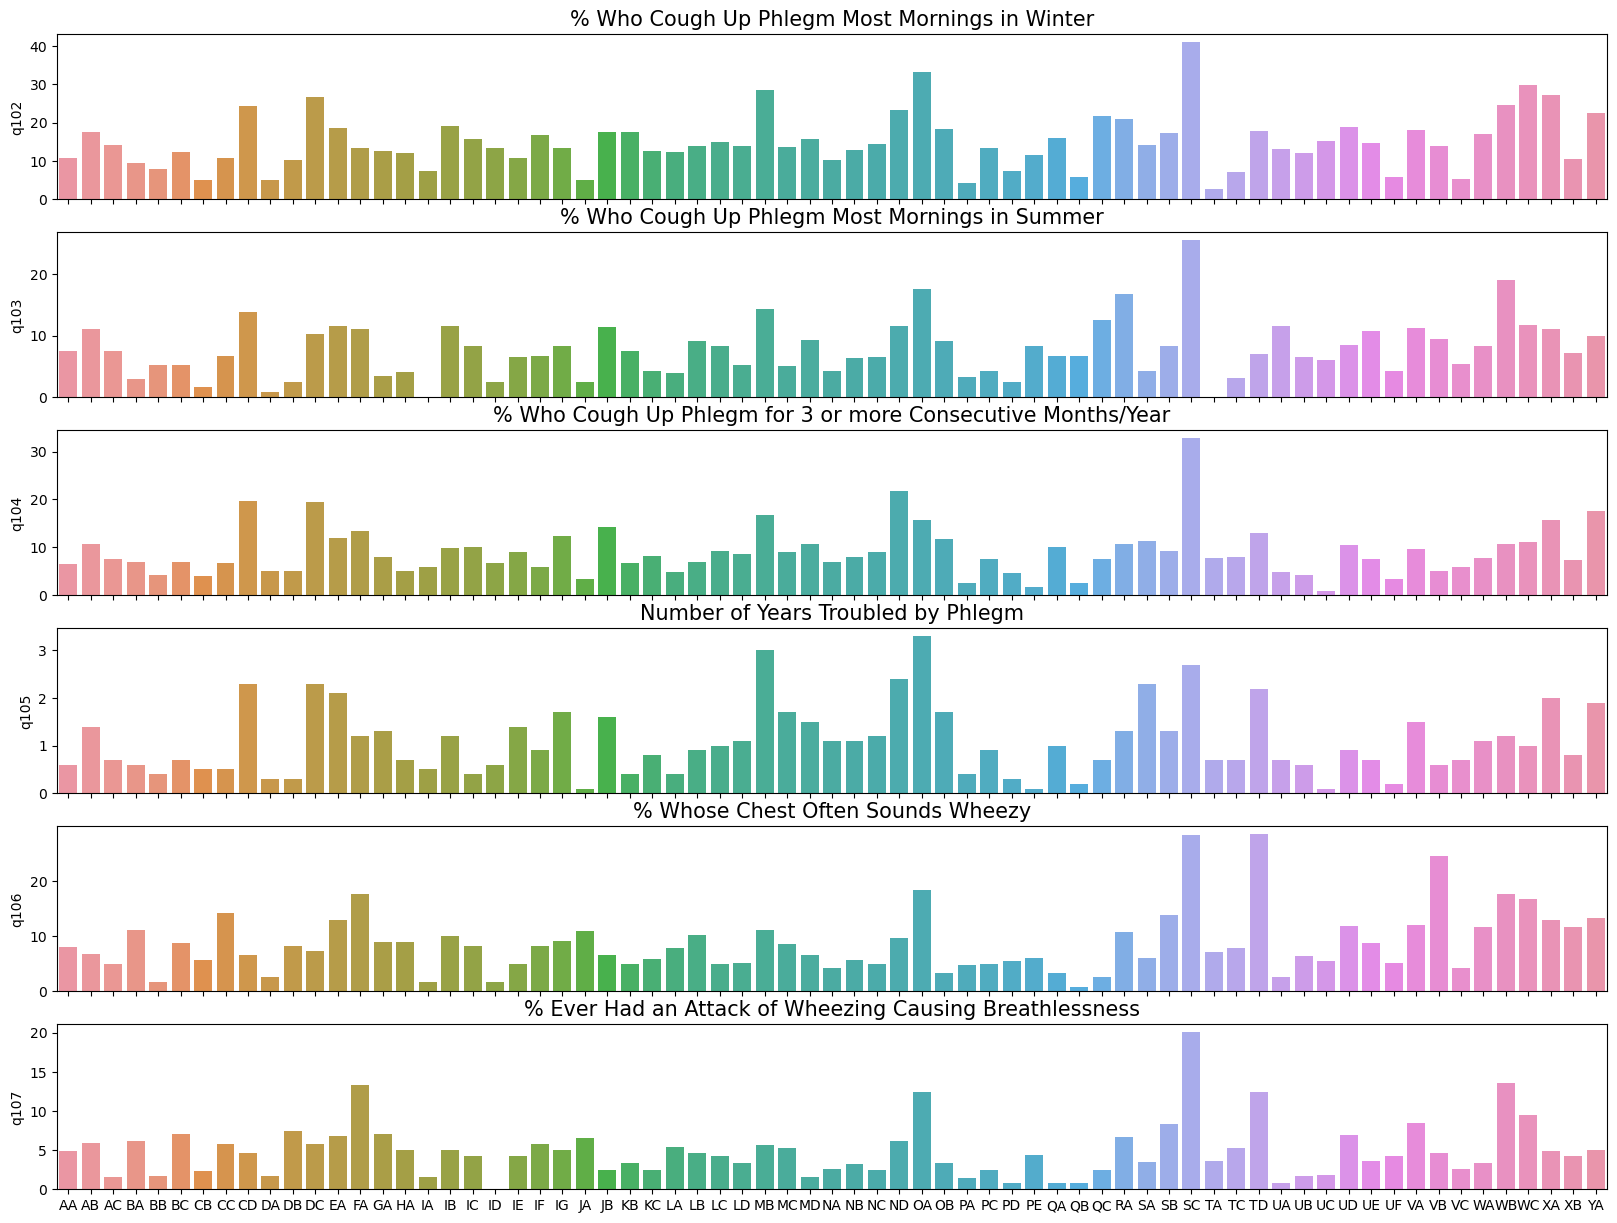

In [63]:
fig, axes = plt.subplots(6, 1, figsize=(20, 15), sharey=False, sharex=True)

sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q102'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('% Who Cough Up Phlegm Most Mornings in Winter', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q103'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('% Who Cough Up Phlegm Most Mornings in Summer', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q104'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('% Who Cough Up Phlegm for 3 or more Consecutive Months/Year', fontsize=15)
axes[2].set(xlabel=None)

sns.barplot(ax = axes[3],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q105'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[3].set_title('Number of Years Troubled by Phlegm', fontsize=15)
axes[3].set(xlabel=None)

sns.barplot(ax = axes[4],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q106'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[4].set_title('% Whose Chest Often Sounds Wheezy', fontsize=15)
axes[4].set(xlabel=None)

sns.barplot(ax = axes[5],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q107'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[5].set_title('% Ever Had an Attack of Wheezing Causing Breathlessness', fontsize=15)
axes[5].set(xlabel=None)

plt.show();

In [64]:
ch93q[['q102','q103','q104', 'q105', 'q106', 'q107']].describe()

,q102,q103,q104,q105,q106,q107
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,15.883516,7.401099,11.801099,1.054945,9.369231,5.078022
std,8.409654,5.911881,6.877071,0.794042,7.063328,5.585294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,3.400000,6.800000,0.500000,4.900000,1.400000
50%,15.600000,6.500000,10.800000,0.900000,7.100000,3.300000
75%,21.250000,9.600000,14.850000,1.450000,11.250000,6.700000
max,40.600000,30.000000,31.300000,3.500000,33.300000,28.000000


In [65]:
chtaiq[['q102','q103','q104', 'q105', 'q106', 'q107']].describe()

,q102,q103,q104,q105,q106,q107
count,112.000000,112.000000,112.000000,95.000000,112.000000,112.000000
mean,15.293750,8.979464,5.633036,7.203158,5.677679,2.031250
std,8.342027,5.760946,4.203653,6.207639,3.684927,2.234578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.100000,5.175000,3.000000,3.050000,3.000000,0.000000
50%,15.200000,8.800000,4.600000,5.500000,6.050000,1.500000
75%,20.475000,12.100000,8.650000,9.650000,7.625000,3.000000
max,42.400000,27.300000,18.200000,38.000000,17.600000,9.400000


In [66]:
                                                                                                                                                         
# Q108 dSBP       questionniare SYSTOLIC BLOOD PRESSURE (mm Hg)                                                                                                                                                                                             
# Q109 dDBP       questionnaire DIASTOLIC BLOOD PRESSURE (mm Hg)                                                                                                                                                                                            
# Q110 dMIDBP     questionnaire MID BLOOD PRESSURE (SBP+DBP)/2 (mm Hg) 
# Q112 dFVCadj    questionnaire FORCED VITAL CAPACITY (L) how much air exhaled at once (lung test) (adjusted for age and height) 
# ch83q.loc[:,'q106': 'q112'].describe()
ch89q.loc[:,'q108': 'q112'].describe()

,q108,q109,q110,q111,q112
count,483.000000,483.000000,483.000000,455.000000,455.000000
mean,117.819876,77.195652,97.421946,2.434044,3.217714
std,5.893475,4.079175,4.648144,0.380387,0.541038
min,100.000000,66.500000,83.400000,1.510000,2.150000
25%,114.000000,74.800000,94.550000,2.140000,2.715000
50%,118.000000,77.300000,97.400000,2.410000,3.190000
75%,121.000000,79.500000,100.100000,2.735000,3.680000
max,136.000000,91.600000,111.700000,3.270000,4.300000


In [67]:
ch93q.loc[:,'q106': 'q112'].describe()

,q106,q107,q108,q109,q110,q111,q112
count,91.000000,91.000000,91.000000,91.000000,91.000000,70.000000,70.000000
mean,9.369231,5.078022,118.142857,77.041758,97.527473,2.270571,2.879571
std,7.063328,5.585294,9.395710,6.762052,7.930280,0.398526,0.536531
min,0.000000,0.000000,88.000000,57.000000,72.300000,1.420000,1.980000
25%,4.900000,1.400000,113.500000,73.150000,92.950000,1.950000,2.477500
50%,7.100000,3.300000,119.000000,76.900000,98.000000,2.205000,2.820000
75%,11.250000,6.700000,123.500000,81.250000,101.600000,2.585000,3.327500
max,33.300000,28.000000,137.000000,95.500000,113.800000,3.040000,3.870000


In [68]:
chtaiq.loc[:,'q106': 'q112'].describe()

,q106,q107,q108,q109,q110,q111,q112
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,5.677679,2.031250,120.035714,77.178571,98.559821,2.256250,2.747589
std,3.684927,2.234578,5.354006,4.227973,4.599461,0.350912,0.461061
min,0.000000,0.000000,106.000000,66.800000,86.400000,1.410000,1.640000
25%,3.000000,0.000000,117.000000,74.075000,95.400000,1.957500,2.327500
50%,6.050000,1.500000,119.000000,77.200000,98.050000,2.230000,2.730000
75%,7.625000,3.000000,124.000000,80.100000,101.525000,2.602500,3.212500
max,17.600000,9.400000,138.000000,87.800000,112.800000,2.890000,3.500000


In [69]:
# Q119 dCHINAMED  questionnaire PERCENTAGE USED CHINESE MEDICINE REGULARLY DURING PAST 6 MONTHS                                                                                                                                                                
# Q120 dWESTMED   questionnaire PERCENTAGE USED WESTERN MEDICINE REGULARLY DURING PAST 6 MONTHS                                                                                                                                                                
# Q121 dANTIBIOT  questionnaire PERCENTAGE USED MAINLY WESTERN ANTIBIOTICS DURING PAST 6 MONTHS                                                                                                                                                                 
# Q122 dANTACID   questionnaire PERCENTAGE USED MAINLY WESTERN ANTACIDS DURING PAST 6 MONTHS                                                                                                                                                                  
# Q123 dANALGES   questionnaire PERCENTAGE USED MAINLY WESTERN ANALGESICS DURING PAST 6 MONTHS  
# ch83q.loc[:,'q119': 'q123'].describe()
ch89q.loc[:,'q119': 'q123'].describe()

,q119,q120,q121,q122,q123
count,483.000000,483.000000,483.000000,483.000000,483.000000
mean,4.929607,17.709317,7.414079,3.840166,4.888820
std,4.952129,11.113265,6.477837,3.777829,5.810357
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.600000,10.000000,3.200000,0.000000,0.000000
50%,3.400000,15.200000,6.700000,3.300000,3.300000
75%,6.700000,24.350000,10.000000,6.150000,6.700000
max,32.400000,61.500000,34.300000,23.500000,42.300000


In [70]:
# ch93q.loc[:,'q119': 'q123'].describe()
chtaiq.loc[:,'q119': 'q123'].describe()

,q119,q120,q121,q122,q123
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,7.930357,33.494643,5.242857,10.518750,6.389286
std,6.240031,12.843920,6.334913,6.270531,8.220238
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.975000,25.775000,1.475000,6.100000,1.500000
50%,6.450000,33.200000,3.050000,9.750000,4.150000
75%,12.100000,41.200000,6.200000,12.950000,7.500000
max,26.500000,78.800000,39.400000,36.400000,45.500000


In [71]:
# Q124 dFAMINE    questionnaire PERCENTAGE EXPERIENCED SEVERE FOOD SHORTAGES DURING THE LAST 30 YEARS                                                                                                                                                           
# Q125 dFAMINDUR  questionnaire TOTAL DURATION OF SEVERE FOOD SHORTAGES DURING THE LAST 30 YEARS (months)                                                                                                                                                       
# Q126 dWTLOSS    questionnaire PERCENTAGE WHO LOST WEIGHT DURING FOOD SHORTAGE                                                                                                                                                                            
# Q127 dFAMINILL  questionnaire PERCENTAGE WHO SUFFERED ILLNESS AS A RESULT OF FOOD SHORTAGE
# ch83q.loc[:,'q124': 'q127'].describe()
ch89q.loc[:,'q124': 'q127'].describe()

,q124,q125,q126,q127
count,483.000000,483.000000,483.000000,483.000000
mean,81.089027,13.725466,62.923602,13.777847
std,16.436800,6.688650,21.790361,10.281308
min,3.300000,0.100000,0.000000,0.000000
25%,73.300000,8.900000,47.350000,6.700000
50%,84.800000,12.700000,64.000000,11.800000
75%,93.300000,17.650000,80.000000,18.900000
max,100.000000,38.200000,100.000000,59.300000


In [72]:
# ch93q.loc[:,'q124': 'q127'].describe()
# chtaiq.loc[:,'q124': 'q127'].describe()

In [73]:
# Q128 dSMOKE     questionnaire PERCENTAGE WHO HAVE EVER SMOKED ANY FORM OF TOBACCO DAILY FOR MORE THAN 6 MONTHS                                                                                                                                               
# Q129 dSMOKENOW  questionnaire PERCENTAGE WHO CURRENTLY SMOKE (and have done so daily for more than 6 months)                                                                                                                                                 
# Q130 dSMOKNOWm  questionnaire PERCENTAGE OF MALES WHO CURRENTLY SMOKE (and have done so daily for more than 6 months)                                                                                                                                         
# Q131 dSMOKNOWf  questionnaire PERCENTAGE OF FEMALES WHO CURRENTLY SMOKE (and have done so daily for more than 6 months)                                                                                                                                       
# Q132 dSMOKAGEm  questionnaire AGE MALE SMOKERS STARTED SMOKING (years)                                                                                                                                                                                      
# Q133 dSMOKAGEf  questionnaire AGE FEMALE SMOKERS STARTED SMOKING (years)                                                                                                                                                                                     
# Q134 dSMOK<25m  questionnaire PERCENT OF TOTAL MALE POPULATION WHO STARTED SMOKING BEFORE AGE 25 AND WHO CURRENTLY SMOKE                                                                                                                                      
# Q135 dSMOK<25f  questionnaire PERCENT OF TOTAL FEMALE POPULATION WHO STARTED SMOKING BEFORE AGE 25 AND WHO CURRENTLY SMOKE                                                                                                                                  
# Q136 dMFCTCIG   questionnaire PERCENTAGE WHO HAVE EVER SMOKED MANUFACTURED CIGARETTES DAILY FOR MORE THAN 6 MONTHS                                                                                                                                           
# Q137 dCIGCONS   questionnaire CURRENT DAILY CONSUMPTION OF MANUFACTURED CIGARETTES (no. per person)                                                                                                                                                          
# Q138 dCIGCONSm  questionnaire CURRENT DAILY CONSUMPTION OF MANUFACTURED CIGARETTES IN MALES (no. per man)                                                                                                                                                   
# Q139 dCIGCONSf  questionnaire CURRENT DAILY CONSUMPTION OF MANUFACTURED CIGARETTES IN FEMALES (no. per woman)                                                                                                                                                 
# Q140 dTOBCONS   questionnaire CURRENT DAILY CONSUMPTION OF "OTHER" TOBACCO (EXCLUDING MANUFACTURED CIGARETTES)                                            (g per person)                                                                                     
# Q141 dTOTTOBAC  questionnaire TOTAL CURRENT DAILY CONSUMPTION OF TOBACCO (g per person)                                                                                                                                                                       
# Q142 dTOBCONSm  questionnaire CURRENT DAILY CONSUMPTION OF "OTHER" TOBACCO (EXCLUDING MANUFACTURED CIGARETTES)                                             BY MALES (g per man)                                                                               
# Q143 dTOBCONSf  questionnaire CURRENT DAILY CONSUMPTION OF "OTHER" TOBACCO (EXCLUDING MANUFACTURED CIGARETTES)                                            BY FEMALES (g per woman)                                                                           
# Q144 dHOMECIG   questionnaire PERCENTAGE WHO HAVE EVER SMOKED HOMEMADE CIGARETTES DAILY FOR MORE THAN 6 MONTHS                                                                                                                                                
# Q145 dPIPE      questionnaire PERCENTAGE WHO HAVE EVER SMOKED A PIPE DAILY FOR MORE THAN 6 MONTHS                                                                                                                                                            
# Q146 dH2OPIPE   questionnaire PERCENTAGE WHO HAVE EVER SMOKED A WATER PIPE DAILY FOR MORE THAN 6 MONTHS                                                                                                                                                      
# Q147 dCIGAR     questionnaire PERCENTAGE WHO HAVE EVER SMOKED CIGARS DAILY FOR MORE THAN 6 MONTHS                                                                                                                                                         
# Q148 dSNUFF     questionnaire PERCENTAGE WHO HAVE EVER USED SNUFF DAILY FOR MORE THAN 6 MONTHS 
ch83q.loc[:,'q128': 'q148'].describe()

,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,...,q139,q140,q141,q142,q143,q144,q145,q146,q147,q148
count,448.000000,448.000000,192.000000,192.000000,192.000000,148.000000,192.000000,192.000000,448.000000,448.000000,...,192.000000,448.000000,448.000000,192.000000,192.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,46.715625,44.420536,77.207292,11.632292,22.881771,30.341216,52.008333,6.067188,32.869420,3.719196,...,0.457813,3.144263,7.432612,5.590417,0.698073,12.918750,7.891741,1.438393,1.082589,0.149107
std,34.263356,33.207163,12.378128,15.339618,2.421378,9.663445,14.752181,11.513976,29.687243,4.331270,...,0.904000,4.312348,6.571437,5.054168,1.791162,19.448009,15.574558,7.864780,4.343790,1.259167
min,0.000000,0.000000,45.800000,0.000000,18.200000,10.000000,12.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.300000,8.000000,68.750000,0.000000,21.350000,22.900000,41.525000,0.000000,4.200000,0.175000,...,0.000000,0.000000,0.555000,1.122500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,46.550000,78.700000,5.000000,22.550000,30.000000,52.750000,1.650000,27.050000,1.900000,...,0.100000,1.020000,7.290000,4.450000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,75.225000,87.000000,15.475000,24.200000,37.075000,62.925000,6.000000,57.700000,6.225000,...,0.400000,4.930000,12.740000,8.665000,0.540000,17.825000,7.750000,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,71.400000,31.500000,53.700000,82.600000,56.500000,100.000000,17.400000,...,5.900000,19.530000,25.610000,19.530000,12.920000,92.000000,80.800000,78.600000,44.000000,19.200000


In [74]:
ch89q.loc[:,'q128': 'q148'].describe()

,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,...,q139,q140,q141,q142,q143,q144,q145,q146,q147,q148
count,483.000000,483.000000,207.000000,207.000000,207.000000,141.000000,207.000000,207.000000,483.000000,483.000000,...,207.000000,483.000000,483.000000,207.000000,207.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,43.361905,40.645342,72.717874,8.571498,22.599517,29.524823,49.962802,4.455556,33.434783,5.331884,...,0.697101,3.112153,9.260000,5.633623,0.590580,12.099379,3.305590,1.407453,1.220911,0.028364
std,33.752004,32.129091,12.767937,12.714838,2.308984,10.525623,14.300968,8.951192,30.166498,5.708531,...,1.309410,4.884161,8.508565,6.017799,1.724366,18.214170,6.989057,6.987332,3.752741,0.287648
min,0.000000,0.000000,36.400000,0.000000,17.900000,8.000000,16.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,3.900000,64.600000,0.000000,21.000000,21.000000,40.000000,0.000000,3.350000,0.200000,...,0.000000,0.000000,0.640000,0.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.200000,41.600000,74.200000,3.300000,22.200000,28.500000,50.000000,0.000000,28.100000,3.700000,...,0.100000,0.540000,8.120000,3.810000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000
75%,75.850000,70.350000,81.850000,10.000000,23.900000,37.000000,60.000000,3.650000,58.250000,8.800000,...,0.700000,4.455000,15.385000,8.600000,0.245000,16.850000,3.300000,0.000000,0.000000,0.000000
max,100.000000,96.700000,96.700000,53.300000,29.300000,55.000000,83.300000,50.000000,100.000000,27.200000,...,6.400000,27.860000,38.530000,27.860000,10.950000,86.700000,46.200000,74.300000,45.500000,4.200000


In [75]:
ch93q.loc[:,'q128': 'q148'].describe()

,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,...,q139,q140,q141,q142,q143,q144,q145,q146,q147,q148
count,91.000000,91.00000,39.000000,39.000000,39.000000,27.000000,39.000000,39.000000,91.000000,91.000000,...,39.000000,91.000000,91.000000,39.000000,39.000000,91.000000,91.000000,91.000000,91.000000,91.0
mean,43.618681,41.02967,74.774359,7.282051,23.369231,28.437037,49.282051,3.725641,34.921978,5.738462,...,0.443590,2.655495,9.278901,4.724103,0.586923,7.071429,5.306593,0.813187,1.797802,0.0
std,35.030983,32.91081,9.792202,10.908733,2.373555,10.813565,13.197106,8.690670,30.766608,5.841247,...,0.557624,5.733492,8.821861,7.719401,1.925946,14.038782,10.723057,2.109777,5.311308,0.0
min,0.000000,0.00000,51.500000,0.000000,18.700000,16.000000,22.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.350000,3.55000,69.250000,0.000000,21.600000,20.750000,38.350000,0.000000,3.550000,0.400000,...,0.000000,0.000000,0.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,43.300000,41.60000,76.700000,3.300000,23.000000,26.000000,51.500000,0.000000,33.300000,4.800000,...,0.200000,0.000000,8.830000,1.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,79.700000,75.00000,80.650000,10.300000,25.150000,33.300000,57.850000,3.300000,63.100000,9.400000,...,0.750000,2.675000,15.170000,3.745000,0.000000,4.950000,3.550000,0.000000,0.000000,0.0
max,93.800000,90.30000,90.300000,43.300000,28.000000,60.000000,75.000000,40.000000,93.500000,19.500000,...,1.900000,29.050000,35.310000,29.050000,7.620000,63.300000,56.700000,12.800000,28.100000,0.0


In [76]:
# chtaiq.loc[:,'q128': 'q148'].describe()

In [77]:
# Q149 dALCEVER   questionnaire PERCENTAGE EVER DRUNK ALCOHOL 3 OR MORE DAYS A WEEK FOR MORE THAN 6 MONTHS                                                                                                                                                  
# Q150 dBEER      questionnaire PERCENTAGE WHO HAVE EVER DRUNK BEER 3 OR MORE DAYS A WEEK FOR 6 MONTHS                                                                                                                                                         
# Q151 dBEERday   questionnaire CURRENT DAILY CONSUMPTION OF BEER (g per person)                                                                                                                                                                              
# Q152 dWINE      questionnaire PERCENTAGE WHO HAVE EVER DRUNK WINE 3 OR MORE DAYS A WEEK FOR 6 MONTHS                                                                                                                                                          
# Q153 dWINEday   questionnaire CURRENT DAILY CONSUMPTION OF WINE (g per person)                                                                                                                                                                               
# Q154 dLIQUOR    questionnaire PERCENTAGE WHO HAVE EVER DRUNK LIQUOR 3 OR MORE DAYS A WEEK FOR 6 MONTHS                                                                                                                                                       
# Q155 dLIQRday   questionnaire CURRENT DAILY CONSUMPTION OF LIQUOR (g per person)                                                                                                                                                                             
# Q156 dALCOday   questionnaire TOTAL CURRENT DAILY CONSUMPTION OF ALCOHOL (g per person)

ch83q.loc[:,'q149': 'q156'].describe()

,q149,q150,q151,q152,q153,q154,q155,q156
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,15.274330,0.448214,6.855804,4.048438,10.904018,11.819196,13.310714,8.703795
std,17.784098,1.596920,27.592750,11.549497,49.516639,15.052916,22.120039,13.643123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.100000,0.000000,0.000000,0.000000,0.000000,4.350000,2.800000,2.750000
75%,24.375000,0.000000,0.000000,2.000000,1.100000,20.025000,18.700000,12.200000
max,76.900000,15.400000,204.100000,76.900000,624.700000,66.700000,165.100000,99.500000


In [78]:
ch89q.loc[:,'q149': 'q156'].describe()

,q149,q150,q151,q152,q153,q154,q155,q156
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,29.462112,7.628778,9.121946,9.736646,16.623602,23.007039,12.703106,9.396480
std,25.564846,10.376047,20.564311,15.600967,50.265657,22.168650,19.556315,13.665104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.050000,0.000000,0.000000,0.000000,0.000000,3.300000,0.100000,0.300000
50%,24.300000,3.300000,1.300000,3.300000,0.700000,17.200000,3.900000,3.300000
75%,50.000000,10.000000,8.300000,12.150000,7.800000,38.450000,16.850000,14.750000
max,93.100000,56.700000,187.400000,83.300000,520.700000,87.100000,130.000000,89.900000


In [79]:
# ch93q.loc[:,'q149': 'q156'].describe()
# chtaiq.loc[:,'q149': 'q156'].describe()

In [80]:
# Q157 dRICE      questionnaire DAILY CONSUMPTION OF RICE (g/day air-dry basis)                                                                                                                                                                            
# Q158 dWHEAT     questionnaire DAILY CONSUMPTION OF WHEAT (g/day air-dry basis)                                                                                                                                                                              
# Q159 dMAIZE     questionnaire DAILY CONSUMPTION OF MAIZE (g/day air-dry basis)                                                                                                                                                                             
# Q160 dSORGHUM   questionnaire DAILY CONSUMPTION OF SORGHUM (g/day air-dry basis)                                                                                                                                                                           
# Q161 dMILLET    questionnaire DAILY CONSUMPTION OF MILLET (g/day air-dry basis)                                                                                                                                                                             
# Q162 dLEGUME    questionnaire DAILY CONSUMPTION OF LEGUMES (mostly soya beans) (g/day air-dry basis)                                                                                                                                                         
# Q163 dSWEETPOT  questionnaire DAILY CONSUMPTION OF FRESH AND DRIED SWEET POTATOES (g/day fresh weight)

ch83q.loc[:,'q157': 'q164'].describe()

,q157,q158,q159,q160,q161,q162,q163,q164
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,338.205580,119.704018,74.039062,5.120536,13.595089,10.350893,115.539509,11.840402
std,262.602769,145.976093,115.458340,18.547665,35.427993,10.431099,153.358282,5.254277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.700000,5.475000,0.000000,0.000000,0.000000,2.675000,6.575000,7.900000
50%,392.500000,53.100000,0.500000,0.000000,0.000000,7.600000,58.600000,11.400000
75%,582.350000,189.200000,142.750000,0.000000,1.900000,14.025000,146.975000,15.100000
max,873.100000,563.300000,660.400000,198.400000,241.400000,73.100000,903.200000,32.600000


In [81]:
ch89q.loc[:,'q157': 'q164'].describe()

,q157,q158,q159,q160,q161,q162,q163,q164
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,336.870186,177.025880,44.808696,1.260455,13.758592,12.313251,72.452588,17.025259
std,243.814518,205.375153,83.530667,3.897221,39.317289,10.690269,89.120227,4.862250
min,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000
25%,35.300000,13.750000,0.000000,0.000000,0.000000,4.650000,11.300000,13.650000
50%,424.300000,63.400000,1.500000,0.000000,0.100000,9.000000,37.700000,16.900000
75%,517.000000,347.350000,60.050000,0.100000,2.400000,16.600000,102.350000,20.450000
max,839.300000,774.200000,441.600000,29.000000,239.700000,56.800000,504.600000,33.000000


In [82]:
ch93q.loc[:,'q157': 'q164'].describe()

,q157,q158,q159,q160,q161,q162,q163,q164
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,248.683516,199.468132,51.579121,0.445055,19.372527,9.807692,31.980220,24.243956
std,190.424700,204.035626,72.648411,1.110582,38.253781,8.628599,37.665009,9.270649
min,8.300000,0.300000,0.000000,0.000000,0.000000,0.400000,0.000000,12.400000
25%,41.600000,27.750000,0.300000,0.000000,0.000000,3.000000,6.550000,16.850000
50%,267.500000,78.500000,4.800000,0.000000,0.200000,7.700000,17.600000,20.000000
75%,422.300000,381.400000,80.400000,0.300000,21.150000,13.650000,42.300000,30.250000
max,579.200000,661.300000,253.000000,6.600000,153.300000,36.300000,145.800000,51.200000


In [83]:
# chtaiq.loc[:,'q157': 'q164'].describe()

In [84]:
# Q168 dANIMFAT   questionnaire DAILY CONSUMPTION OF ANIMAL FAT (g/day)                                                                                                                                                                                        
# Q169 dVEGFAT    questionnaire DAILY CONSUMPTION OF VEGETABLE FAT (g/day)                                                                                                                                                                                     
# Q170 dLEGUMyr   questionnaire DAYS PER YEAR EAT LEGUMES AND LEGUME PRODUCTS                                                                                                                                                                                  
# Q171 dSALTVEG   questionnaire DAYS PER YEAR EAT SALT PRESERVED VEGETABLES                                                                                                                                                                                   
# Q172 dGRNVEG    questionnaire DAYS PER YEAR EAT GREEN VEGETABLES                                                                                                                                                                                             
# Q173 dFRUIT     questionnaire DAYS PER YEAR EAT FRUIT                                                                                                                                                                                                        
# Q174 dFISH      questionnaire DAYS PER YEAR EAT FISH                                                                                                                                                                                                         
# Q175 dMEAT      questionnaire DAYS PER YEAR EAT MEAT                                                                                                                                                                                                         
# Q176 dEGGS      questionnaire DAYS PER YEAR EAT EGGS                                                                                                                                                                                                         
# Q177 dMILK      questionnaire DAYS PER YEAR CONSUME MILK OR DAIRY PRODUCTS

# ch83q.loc[:,'q168':'q177'].describe()
ch89q.loc[:,'q168':'q177'].describe()

,q168,q169,q170,q171,q172,q173,q174,q175,q176,q177
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,6.501035,10.528157,60.506625,72.770186,206.368530,43.100414,47.532712,78.251553,57.456522,18.775983
std,5.176681,5.645337,34.401109,79.924257,76.468017,30.198385,69.874416,63.111230,39.602301,64.242411
min,0.100000,0.000000,0.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,6.000000,35.250000,19.000000,136.000000,21.700000,0.850000,35.600000,28.450000,0.000000
50%,4.800000,10.200000,57.800000,35.000000,218.000000,35.300000,17.300000,61.200000,48.800000,0.400000
75%,9.300000,14.650000,84.600000,99.000000,270.500000,57.250000,56.600000,101.000000,76.800000,4.600000
max,26.700000,25.800000,178.100000,354.000000,338.000000,170.000000,286.600000,360.000000,214.500000,360.000000


In [85]:
ch93q.loc[:,'q168':'q177'].describe()

,q168,q169,q170,q171,q172,q173,q174,q175,q176,q177
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,90.000000,91.000000,91.000000,91.000000
mean,10.880220,13.382418,71.775824,57.802198,213.505495,54.201099,63.467778,97.018681,79.158242,6.465934
std,11.482385,7.514425,33.852311,59.167412,82.480620,39.666556,84.049997,45.752943,56.942856,11.577682
min,0.100000,0.000000,8.600000,6.000000,35.000000,0.000000,0.000000,31.800000,9.100000,0.000000
25%,0.950000,7.200000,47.600000,18.000000,158.500000,24.950000,3.825000,63.650000,21.050000,0.000000
50%,5.700000,14.200000,72.200000,32.000000,245.000000,38.500000,14.700000,87.100000,79.000000,0.400000
75%,19.050000,19.300000,91.200000,67.000000,283.500000,78.500000,99.600000,128.600000,114.800000,6.150000
max,44.500000,27.400000,155.300000,236.000000,338.000000,176.900000,292.500000,241.200000,221.400000,49.700000


In [86]:
# chtaiq.loc[:,'q168':'q177'].describe()

In [87]:
# Q178 dJASMIN-T  questionnaire PERCENT DRINK JASMINE TEA DAILY                                                                                                                                                                                                
# Q179 dGREEN-T   questionnaire PERCENT DRINK GREEN TEA DAILY                                                                      
# Q180 dGREENTEA  questionnaire PERCENT DRINK JASMINE OR GREEN TEA DAILY                                                                                                                                                                                        
# Q181 dBLACK-T   questionnaire PERCENT DRINK BLACK TEA DAILY                                                                                                                                                                                                  
# Q182 dOOLONG-T  questionnaire PERCENT DRINK OOLONG TEA DAILY                                                                                                                                                                                                 
# Q183 dBRICK-T   questionnaire PERCENT DRINK BRICK TEA DAILY                                                                                                                                                                                                  
# Q184 dBLACKTEA  questionnaire PERCENT DRINK BLACK, OOLONG OR BRICK TEA DAILY

# ch83q.loc[:,'q178':'q184'].describe()
ch89q.loc[:,'q178':'q184'].describe()

,q178,q179,q180,q181,q182,q183,q184
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,7.793375,11.048654,18.567495,5.708903,1.238923,7.987578,14.740580
std,17.901439,18.868151,23.607131,12.372011,7.312620,23.886569,26.065566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000
50%,1.400000,3.000000,7.500000,0.000000,0.000000,0.000000,3.200000
75%,6.300000,11.650000,26.700000,4.950000,0.000000,0.000000,13.300000
max,93.100000,91.300000,93.100000,73.500000,77.400000,100.000000,100.000000


In [88]:
ch93q.loc[:,'q178':'q184'].describe()

,q178,q179,q180,q181,q182,q183,q184
count,76.000000,89.000000,76.000000,89.000000,89.000000,89.000000,89.000000
mean,30.714474,31.931461,49.760526,10.361798,1.704494,2.348315,11.002247
std,33.647699,32.772295,32.907373,18.368324,6.303352,8.974080,18.127146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,23.700000,0.000000,0.000000,0.000000,0.000000
50%,10.400000,28.800000,54.300000,0.000000,0.000000,0.000000,0.000000
75%,58.425000,55.900000,79.100000,14.800000,0.000000,0.000000,14.800000
max,100.000000,97.300000,100.000000,63.200000,36.000000,51.700000,63.200000


In [89]:
chtaiq.loc[:,'q178':'q184'].describe()

,q178,q179,q180,q181,q182,q184
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,13.750893,18.592857,23.452679,34.317857,50.402679,66.649107
std,10.243337,12.211711,13.717300,19.895883,19.561755,16.676671
min,0.000000,0.000000,3.000000,0.000000,3.000000,6.100000
25%,5.900000,7.750000,12.025000,18.050000,37.900000,57.475000
50%,10.600000,16.950000,19.100000,33.750000,51.700000,69.700000
75%,21.200000,27.300000,33.300000,45.500000,65.775000,79.400000
max,47.100000,52.900000,58.800000,90.900000,93.900000,100.000000


In [90]:
# Q185 dAGEMENS   questionnaire AGE STARTED MENSTRUATION (years)    
# Q186 dMENCYCLE  questionnaire LENGTH OF MENSTRUAL CYCLE (days) 
# Q187 dBLEED     questionnaire DURATION OF BLEEDING DURING MENSTRUAL CYCLE (days)    
# Q188 dAGEMENOP  questionnaire ESTIMATED MEDIAN AGE AT MENOPAUSE (years)   
# Q189 dPREG1st   questionnaire AGE AT FIRST PREGNANCY (years)   
# Q190 dTOTPREG   questionnaire NUMBER OF PREGNANCIES (per woman) 
# Q191 dDEADBRTH  questionnaire NUMBER OF FAILED PREGNANCIES (per woman)    
# Q192 dLIVEBRTH  questionnaire NUMBER OF LIVEBIRTHS (per woman)   
# Q193 eTOTPREG   questionnaire NUMBER OF PREGNANCIES (per woman giving birth in 1987-9)
# Q194 eLIVEBRTH  questionnaire NUMBER OF LIVEBIRTHS (per woman giving birth in 1987-9)                
# Q195 eMOTHERS   questionnaire 1987-9 BIRTHS: NUMBER OF MOTHERS GIVING BIRTH DURING 1987-1989
# ch83q.loc[:,'q185':'q195'].describe()
ch89q.loc[:,'q185':'q195'].describe()

,q185,q186,q187,q188,q189,q190,q191,q192,q193,q194,q195
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,206.000000,206.000000
mean,16.758937,29.010628,4.336715,49.036232,22.717391,4.983575,0.878261,4.106763,1.980097,1.800000,57.053398
std,0.844919,1.250663,0.439555,1.286559,1.368185,1.079249,0.415782,0.880563,0.429795,0.448521,24.461260
min,14.300000,26.000000,3.500000,43.000000,19.400000,2.300000,0.000000,2.200000,1.100000,1.000000,6.000000
25%,16.300000,28.100000,4.000000,48.000000,21.600000,4.200000,0.600000,3.600000,1.700000,1.500000,46.000000
50%,16.700000,28.900000,4.300000,49.000000,22.800000,4.900000,0.900000,4.000000,2.000000,1.800000,51.000000
75%,17.400000,29.800000,4.600000,50.000000,23.700000,5.600000,1.100000,4.600000,2.200000,2.000000,62.000000
max,19.200000,35.300000,5.800000,53.000000,26.200000,8.100000,2.200000,7.200000,3.500000,3.400000,155.000000


In [91]:
# ch93q.loc[:,'q185':'q195'].describe()
# chtaiq.loc[:,'q185':'q195'].describe()

In [92]:
# Q208 eBORNHOSP  questionnaire 1987-9 BIRTHS: PERCENT OF BABIES BORN IN HOSPITAL/CLINIC                                                                                                                                                                     
# Q209 eBIRTHWT   questionnaire 1987-9 BIRTHS: BIRTH WEIGHT (Kg)                                                                                                                                                                                               
# Q210 eTBIMM     questionnaire 1987-9 BIRTHS: PERCENT OF NEWBORN BABIES RECEIVING TB IMMUNISATION                                                                                                                                                              
# Q211 eDPT1st    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 3 MONTHS OR MORE) RECEIVING FIRST DPT IMMUNISATION                                                                                                                                       
# Q212 eDPT2nd    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 4 MONTHS OR MORE) RECEIVING SECOND DPT IMMUNISATION                                                                                                                                     
# Q213 eDPT3rd    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 5 MONTHS OR MORE) RECEIVING THIRD DPT IMMUNISATION                                                                                                                                       
# Q214 ePOLIO1    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 2 MONTHS OR MORE) RECEIVING FIRST POLIO IMMUNISATION                                                                                                                                     
# Q215 ePOLIO2    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 3 MONTHS OR MORE) RECEIVING SECOND POLIO IMMUNISATION                                                                                                                                    
# Q216 ePOLIO3    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 4 MONTHS OR MORE) RECEIVING THIRD POLIO IMMUNISATION                                                                                                                                     
# Q217 eMEASLES   questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 8 MONTHS OR MORE) RECEIVING MEASLES IMMUNISATION                                                                                                                                        
# Q218 eHBV1st    questionnaire 1987-9 BIRTHS: PERCENT OF NEWBORN BABIES RECEIVING FIRST HBV IMMUNISATION                                                                                                                                                      
# Q219 eHBV2nd    questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 3 WEEKS OR MORE) RECEIVING SECOND HBV IMMUNISATION                                                                                                                                       
# Q220 eFULLIMM   questionnaire 1987-9 BIRTHS: PERCENT OF BABIES (AGED 8 MONTHS OR MORE) RECEIVING COMPLETE IMMUNISATION

# ch83q.loc[:,'q208':'q220'].describe()
ch89q.loc[:,'q208':'q220'].describe()

,q208,q209,q210,q211,q212,q213,q214,q215,q216,q217,q218,q219,q220
count,206.000000,201.000000,206.000000,206.000000,206.00000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,39.976699,3.171811,87.321359,87.821359,74.40534,70.128155,87.966990,74.693689,68.840777,85.636408,8.536408,6.584951,67.655340
std,32.896048,0.296663,17.733879,16.224153,27.80883,29.166223,15.098631,27.173271,28.525918,15.711869,17.130865,15.296699,29.563835
min,0.000000,1.679000,8.200000,16.300000,0.00000,0.000000,12.500000,0.000000,0.000000,9.300000,0.000000,0.000000,0.000000
25%,13.350000,3.025000,83.300000,84.800000,62.62500,54.700000,85.100000,64.725000,56.500000,80.900000,0.000000,0.000000,50.000000
50%,28.600000,3.197000,95.850000,94.250000,86.15000,80.850000,92.900000,85.850000,79.050000,90.500000,1.050000,0.000000,78.900000
75%,65.825000,3.372000,99.000000,97.900000,94.97500,92.000000,96.600000,94.275000,90.750000,95.700000,6.300000,4.500000,90.300000
max,100.000000,4.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,96.000000,82.300000,100.000000


In [93]:
# ch93q.loc[:,'q208':'q220'].describe()
# chtaiq.loc[:,'q208':'q220'].describe()

In [94]:
# Q221 eBREASTFD  questionnaire 1987-9 BIRTHS: PERCENT OF BABIES WHO WERE BREAST FED                                                                                                                                                                          
# Q222 eMILKSUB   questionnaire 1987-9 BIRTHS: PERCENT OF BABIES WHO WERE FED MILK SUBSTITUTE                                                                                                                                                                
# Q223 eANIMMILK  questionnaire 1987-9 BIRTHS: PERCENT OF BABIES WHO WERE FED COW/GOAT MILK                                                                                                                                                                  
# Q224 eBOTTLEFD  questionnaire 1987-9 BIRTHS: PERCENT OF BABIES FED BY BOTTLE                                                                                                                                                                              
# Q225 eBOILBOTL  questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO CLEAN BOTTLE WITH BOILING WATER                                                                                                                                                        
# Q226 eSUPPLEM   questionnaire 1987-9 BIRTHS: PERCENT OF BABIES FED SOLID SUPPLEMENT

# ch83q.loc[:,'q221':'q226'].describe()
ch89q.loc[:,'q221':'q226'].describe()

,q221,q222,q223,q224,q225,q226
count,206.000000,206.000000,206.000000,194.000000,194.000000,206.000000
mean,95.087379,34.559223,24.493204,85.281959,84.257216,75.629612
std,3.794314,19.912028,17.650373,17.854569,21.815723,16.500568
min,82.000000,0.000000,0.000000,20.000000,0.000000,13.500000
25%,93.000000,17.600000,10.500000,77.975000,77.800000,67.775000
50%,95.750000,35.700000,21.900000,91.700000,91.700000,78.200000
75%,98.000000,49.475000,33.900000,100.000000,100.000000,87.375000
max,100.000000,88.000000,70.000000,100.000000,100.000000,100.000000


In [95]:
# ch93q.loc[:,'q221':'q226'].describe()
# chtaiq.loc[:,'q221':'q226'].describe()

In [96]:
                                                                                                                                 
# Q227 e%DIARRH   questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM DIARRHOEA DURING LAST 3 MONTHS                                                                                                                                               
# Q228 eDIARRH    questionnaire 1987-9 BIRTHS: NUMBER OF DAYS IN LAST 3 MONTHS CHILD SUFFERED FROM DIARRHOEA                                                                                                                                                    
# Q229 e%RESP     questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM RESPIRATORY TRACT INFECTION DURING LAST 3 MONTHS                                                                               
# Q230 eRESPINF   questionnaire 1987-9 BIRTHS: NUMBER OF DAYS IN LAST 3 MONTHS CHILD SUFFERED FROM RESPIRATORY TRACT INFECTION                                                    
# Q231 e%FEVER    questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM FEVER DURING LAST 3 MONTHS                                                                                                                                                   
# Q232 eFEVER     questionnaire 1987-9 BIRTHS: NUMBER OF DAYS IN LAST 3 MONTHS CHILD SUFFERED FROM FEVER                                                                                                                                                       
# Q233 eLICE      questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM LICE DURING LAST 3 MONTHS                                                                                                                                                    
# Q234 eWORMS     questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM WORMS                                                                                                                                                                         
# Q235 eSCRATCH   questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SCRATCHING, SUGGESTING PARASITOSIS                                                                                             
# Q236 eFLUID     questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO WOULD GIVE FLUIDS TO A CHILD WITH SEVERE DIARRHOEA                                                       
# Q237 eSOLID     questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO WOULD FEED SOLIDS TO A CHILD WITH SEVERE DIARRHOEA                                                                                      
# Q238 eTRADMED   questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO WOULD GIVE LOCAL TRADITIONAL MEDICINE TO A CHILD WITH SEVERE DIARRHOEA                                                                   
# Q239 eDOCTOR    questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO WOULD TAKE A CHILD WITH SEVERE DIARRHOEA TO A DOCTOR                                                                                           
# Q240 eGOODFOOD  questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO CLAIM TO KNOW WHICH FOODS ARE ESPECIALLY GOOD FOR WEANING A BREAST-FED BABY                                                                      
# Q241 eBADFOOD   questionnaire 1987-9 BIRTHS: PERCENT OF MOTHERS WHO CLAIM TO KNOW WHICH FOODS ARE ESPECIALLY BAD FOR WEANING A BREAST-FED BABY 
# ch83q.loc[:,'q227':'q241'].describe()
ch89q.loc[:,'q227':'q241'].describe()

,q227,q228,q229,q230,q231,q232,q233,q234,q235,q236,q237,q238,q239,q240,q241
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,39.661165,2.504854,35.488835,2.158252,38.471359,1.373301,3.912136,17.055340,7.495146,38.368932,8.668447,12.880583,92.731553,58.770388,12.980583
std,17.467105,1.994792,18.478906,1.415698,18.087778,0.919075,6.312087,15.089995,6.617801,26.023477,12.513451,16.688580,8.242438,28.875109,21.956394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.900000,0.000000,0.000000
25%,28.075000,1.300000,21.750000,1.100000,24.700000,0.700000,0.000000,4.750000,2.600000,16.700000,0.000000,2.000000,90.675000,34.725000,0.000000
50%,38.900000,2.000000,35.650000,2.100000,39.550000,1.200000,2.100000,13.800000,6.100000,37.200000,3.450000,6.850000,95.400000,63.000000,3.850000
75%,50.850000,3.400000,48.475000,3.000000,50.575000,1.800000,4.650000,24.075000,11.050000,58.325000,12.650000,17.300000,98.000000,83.775000,14.600000
max,95.700000,14.900000,93.500000,9.100000,95.700000,5.800000,60.900000,93.500000,36.500000,100.000000,94.000000,98.400000,100.000000,100.000000,98.000000


In [97]:
# ch93q.loc[:,'q227':'q241'].describe()
# chtaiq.loc[:,'q227':'q241'].describe()

In [98]:
formatted_numbers = ['q010', 'q015', 'q016']

In [99]:
numbers = range(22, 26)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [100]:
numbers = range(37, 41)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [101]:
numbers = range(82, 85)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [102]:
numbers = range(87, 113)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [103]:
numbers = range(119, 178)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [104]:
numbers = range(185, 196)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [105]:
numbers = range(208, 221)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [106]:
numbers = range(227, 242)

for number in numbers:
    formatted_number = 'q{:03d}'.format(number)
    formatted_numbers.append(formatted_number)

In [107]:
ch89q.index # checking index length of df before merging

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            611, 612, 613, 614, 615, 616, 617, 618, 619, 620],
           dtype='int64', length=621)

In [108]:
ch89dg.index

Int64Index([  6,   7,   8,  15,  16,  17,  24,  25,  26,  33,
            ...
            593, 600, 601, 602, 609, 610, 611, 618, 619, 620],
           dtype='int64', length=206)

In [109]:
useful_questions = formatted_numbers

In [110]:
ch89q.dropna(axis=0,
            thresh=170,
            inplace=True)

In [111]:
# useful_questions # sanity check
questions_df = pd.DataFrame(data = useful_questions, columns=['question'])

In [112]:
# questions_df # sanity check, this is a list of useful questions to use to be shared with the group.

In [113]:
# questions_df # sanity check
questions_df.to_csv('./cleaned_data_descriptive/questions_list.csv')

In [114]:
ch89q.columns.to_list()[:4]

['county', 'sex', 'xiang', 'q001']

In [115]:
useful = ['county', 'sex', 'xiang'] + useful_questions

In [116]:
# useful # sanity check

In [117]:
ch89q_useful = ch89q[useful].copy()

In [118]:
ch89q_useful.isna().sum().sort_values(ascending=False)
ch89q_useful.dropna(thresh=100)

,county,sex,xiang,q010,q015,q016,q022,q023,q024,q025,...,q232,q233,q234,q235,q236,q237,q238,q239,q240,q241
3,AA,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.9,3.8,1.9,3.8,46.2,15.4,11.5,92.3,88.5,3.8
4,AA,F,2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1.3,2.0,2.0,4.0,44.0,12.0,12.0,88.0,80.0,6.0
5,AA,F,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1.1,2.9,1.9,3.9,45.1,13.7,11.8,90.2,84.3,4.9
12,AB,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.4,0.0,2.0,7.8,31.4,2.0,7.8,90.0,62.8,9.8
13,AB,F,2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1.2,4.2,8.3,12.5,33.3,10.4,2.1,95.8,35.4,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,XB,F,2,NaN,NaN,NaN,3.4,NaN,NaN,NaN,...,0.3,0.0,2.0,1.0,5.0,0.0,7.0,92.9,9.8,0.0
608,XB,F,3,NaN,NaN,NaN,1.7,NaN,NaN,NaN,...,0.1,0.0,1.0,0.5,3.5,0.0,3.5,96.5,5.9,0.0
615,YA,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.5,0.0,0.0,0.0,65.0,0.0,12.5,95.0,32.5,5.0
616,YA,F,2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.5,0.6,1.3,0.0,53.3,0.0,0.6,99.3,18.8,1.3


In [119]:
# list from Jahnavi, thanks!
dg_to_keep = ['county', 'sex', 'xiang', 'd005','d006','d007','d008','d009', 
               'd012','d013','d014','d015','d016', 
               'd028','d029','d030','d031','d032','d033','d034','d035','d036', 
               'd037','d038','d039','d040', 
               'd041','d042','d043','d044','d045','d046', 
               'd047','d048','d049','d050','d051','d052', 
               'g001','g002','g003','g004','g005']

In [120]:
# list from Will, thanks!
m_to_keep = ['county', 'sex', 'xiang', 'm005_ALL35_69', 'm008_MEDICALc', 'm065_STROKEc', 'm023_ALLCAc',
       'm059_ALLVASCc', 'm028_OESOPHCAc', 'm072_COPDc', 'm010_NONMEDc']

In [121]:
ch89dg_useful = ch89dg[dg_to_keep].copy()

In [122]:
ch89dg_useful.head()

,county,sex,xiang,d005,d006,d007,d008,d009,d012,d013,...,d048,d049,d050,d051,d052,g001,g002,g003,g004,g005
6,AA,T,1,29.8,9.9,2.7,7.2,58.8,569.0,54.4,...,17.7,67.9,57.3,10.6,69.4,NaN,NaN,NaN,NaN,NaN
7,AA,T,2,23.2,9.8,2.4,7.5,66.2,503.0,31.1,...,18.3,81.7,63.8,17.9,57.7,NaN,NaN,NaN,NaN,NaN
8,AA,T,3,26.5,9.9,2.6,7.4,62.5,536.0,42.8,...,18.0,74.8,60.5,14.3,63.6,31.1,121.4,50.0,1.0,4.0
15,AB,T,1,21.9,10.0,1.9,8.1,66.9,1492.0,45.1,...,10.5,37.3,33.5,3.9,103.3,NaN,NaN,NaN,NaN,NaN
16,AB,T,2,20.9,9.7,1.9,7.8,68.8,1215.0,38.3,...,12.2,60.6,42.9,17.6,63.1,NaN,NaN,NaN,NaN,NaN


In [123]:
ch89m_useful=ch89m[m_to_keep].copy()
ch89m_useful.head()

,county,sex,xiang,m005_ALL35_69,m008_MEDICALc,m065_STROKEc,m023_ALLCAc,m059_ALLVASCc,m028_OESOPHCAc,m072_COPDc,m010_NONMEDc
0,AA,M,3,15.08,13.98,193.02,6.13,2.50,166.66,333.19,110.50
1,AA,F,3,7.49,6.91,122.77,2.75,1.61,62.46,124.03,58.77
2,AA,T,3,11.29,10.45,157.90,4.44,2.06,114.56,228.61,84.64
3,AB,M,3,15.37,14.45,196.62,6.07,2.43,166.30,352.14,92.30
4,AB,F,3,8.27,7.64,131.42,2.92,1.71,57.80,135.77,62.97


In [124]:
#big old table with all the relevant features 
first = pd.merge(ch89q_useful, ch89dg_useful, 
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])

In [125]:
first.head()

,county,sex,xiang,q010,q015,q016,q022,q023,q024,q025,...,d048,d049,d050,d051,d052,g001,g002,g003,g004,g005
0,AA,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,F,2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,F,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,T,3,40.2,60.0,70.0,3.3,22.4,41.9,35.7,...,18.0,74.8,60.5,14.3,63.6,31.1,121.4,50.0,1.0,4.0
4,AB,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
second = pd.merge(first, ch89m_useful, 
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])

In [127]:
second.head()

,county,sex,xiang,q010,q015,q016,q022,q023,q024,q025,...,g004,g005,m005_ALL35_69,m008_MEDICALc,m065_STROKEc,m023_ALLCAc,m059_ALLVASCc,m028_OESOPHCAc,m072_COPDc,m010_NONMEDc
0,AA,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,F,2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,F,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,7.49,6.91,122.77,2.75,1.61,62.46,124.03,58.77
3,AA,T,3,40.2,60.0,70.0,3.3,22.4,41.9,35.7,...,1.0,4.0,11.29,10.45,157.90,4.44,2.06,114.56,228.61,84.64
4,AB,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
final_df = pd.merge(second, ch89pru,
                    how='left',
                    left_on=['county', 'sex', 'xiang'],
                    right_on=['county', 'sex', 'xiang'])

In [129]:
final_df.head()

,county,sex,xiang,q010,q015,q016,q022,q023,q024,q025,...,u024,u025,u026,u027,u028,u029,u030,u031,u032,u033
0,AA,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,F,2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,F,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,T,3,40.2,60.0,70.0,3.3,22.4,41.9,35.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AB,F,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
final_df.shape

(275, 296)

In [131]:
final_df.to_csv('./cleaned_data_descriptive/combined_df.csv')

In [ ]:
test_df = pd.merge()

# BOOKMARK